### Olympic games - Data exploration about the participating countries, athletes, achievements and the relationship between them.

<div> 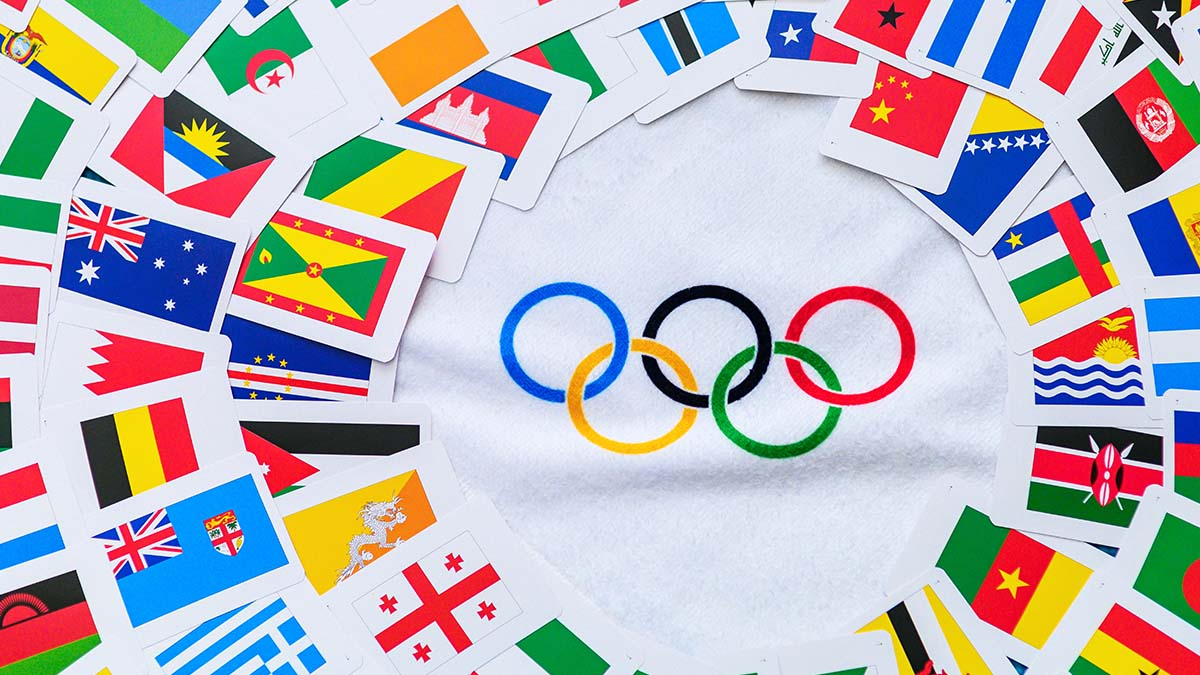</div> 

## Introduction

Hello :)

My name is May, computer science student who is passionate a lot about data and particlarly in Data Science.  
When I thought about what project I would like to do this semester, I knew right away that I wanted to learn something new and challenge myself to gain insights through in-depth research. 
Since I never had a machine learning experience and since I am passionate about the olymipc games, I thought it would be a great opportunity for me to combine these two fileds in order to make my Data Science Workshop. 

The theme of the  project is buliding AI predection model(with sklearn) that will try to predeict the amount of medals that country will achive for her state depending on team structure like amount competitors, avg age and GDP and not only.

I will analyze the data set containing information regarding all Olympic Summer and Winter Games since 1896 to 2016 compared to the World Population Index and GDP.
I will explore the data using  Pandas and Numpy libraries and illustrate the insights by using Matplotlib, Seaborn and Plotly libraries.


# Motivation and Purposes

As is well known, the Olympic Games are the largest sporting event in the world since 1896, held every 4 years with the largest number of competitors in 26 different sports. Because of the size of the class and the scope of the competition, the Olympic medals are considered the most prestigious and the winners are considered the best in the world, and since the coverage around the Games is global, it is important that each country has adequate representation in the competition.

Analyzing the data of the Olympic Games can be a significant and strategic tool in understanding the chances of success of any team.
Based on the long history of the Games, a model can be built for each sport in terms of age, height and weight of contestants with a greater chance of success and in addition measure the chance of success given the country's investment in the Olympic team (since we rely on GDP data richer countries More also in sports).

For this purpose, there are quite a few difficulties, such as missing appropriate data for analysis and difficulties in switching between many different types of data.

In order to overcome the obstacles I will try to explore additional options that may give help.

# Soruce of the data 

All the data sets are token the from Kaggle.

The first table is athlete_events. 
Each row is an athlete-event. The ID column can be used to uniquely identify athletes, since some athletes have the same name.
link: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

The second table is dictionary.Each row is an IOC country codes and population/GDP estimates.
link: https://www.kaggle.com/datasets/the-guardian/olympic-games

## Exploring the Olympics Data set
Let's load our data with pandas dataframe, and perform some basic preprocessing operations:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
ath_path='/Users/mayrozental/Desktop/אוניברסיטה/מדמ״ח/סדנה במדעי הנתונים/DataSets/athlete_events.csv'
athlete=pd.read_csv(ath_path)
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
athlete.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
print('We have {} rows (All competitors who participated in the Games from {} to {}) and {} columns.\n The variables include : {}. \nLet׳s check if there is missing data '.format(athlete.shape[0],min(athlete.Year),max(athlete.Year),athlete.shape[1],athlete.columns.values))

We have 271116 rows (All competitors who participated in the Games from 1896 to 2016) and 15 columns.
 The variables include : ['ID' 'Name' 'Sex' 'Age' 'Height' 'Weight' 'Team' 'NOC' 'Games' 'Year'
 'Season' 'City' 'Sport' 'Event' 'Medal']. 
Let׳s check if there is missing data 


In [6]:
total = athlete.isnull().sum().sort_values(ascending = False)
percent = (athlete.isnull().sum()/athlete.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])[0:4]

Total    Percent
Medal   231333  85.326207
Weight   62875  23.191180
Height   60171  22.193821
Age       9474   3.494445

Now we can see how much values are null. We find that height and weight having more then 20% of missing data and Age 3.5% of missing values.

At this point we still do not know how this will affect the conclusions and prediction we want to reach. Since at this stage we can get an indication that the missing values in the category of medals reflect the amount of people who did not win the medal. For convenience we will replace these nulls with "No_Medal".

In [7]:
athlete['Medal'].fillna('No_Medal',inplace=True)
# No_Medal = did not win

In [8]:
dictionary=pd.read_csv('/Users/mayrozental/Desktop/אוניברסיטה/מדמ״ח/סדנה במדעי הנתונים/DataSets/dictionary.csv')
dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [9]:
dictionary.head()

Country Code  Population  GDP per Capita
0      Afghanistan  AFG  32526562.0      594.323081
1          Albania  ALB   2889167.0     3945.217582
2          Algeria  ALG  39666519.0     4206.031232
3  American Samoa*  ASA     55538.0             NaN
4          Andorra  AND     70473.0             NaN

In [10]:
print('We have {} rows and {} columns.\n The variables include : {}. \nLet׳s check if there is missing data '.format(dictionary.shape[0],dictionary.shape[1],dictionary.columns.values))

We have 201 rows and 4 columns.
 The variables include : ['Country' 'Code' 'Population' 'GDP per Capita']. 
Let׳s check if there is missing data 


In [11]:
total = dictionary.isnull().sum().sort_values(ascending = False)
percent = (dictionary.isnull().sum()/dictionary.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])[:2]

Total    Percent
GDP per Capita     25  12.437811
Population          5   2.487562

we have almost 13 percents of gdp per capita that missing and almost 3 precents of population that missing.

This lack of information may not be affected.
We will do inner join between the tables and check based on the noc columns shared by the two tables how much we have in common.
That is, we will ask the question whether there are countries that have GDP but did not participate in the Olympics and whether there are countries in the Olympics that do not have GDP.

In [12]:
# first table
athlete_noc=athlete['NOC'].drop_duplicates()
athlete_noc.shape[0]

# second table
dictionary=dictionary.dropna()
dic_code=dictionary['Code'].drop_duplicates()

print("In the first table we have {} values and the second we have {}".format(athlete_noc.shape[0],dic_code.shape[0]))

In the first table we have 230 values and the second we have 176


In [13]:
#updated_dic
updated_dic=dictionary.rename(columns={'Code':'NOC'})
dic_code=updated_dic['NOC'].drop_duplicates()
athlete_dic_noc=pd.merge(athlete_noc,dic_code,on='NOC', how="inner")

print("We get {} valuse.\n In other words it means that {} do not have GDP and {} not participated in the Olympics.\n Let's check".format(athlete_dic_noc.shape[0],athlete_noc.shape[0]-athlete_dic_noc.shape[0],dic_code.shape[0]-athlete_dic_noc.shape[0]))

We get 173 valuse.
 In other words it means that 57 do not have GDP and 3 not participated in the Olympics.
 Let's check


In [14]:
#countries without GDP data 
athlete_dic_noc=pd.merge(athlete_noc,dic_code,on='NOC', how="right")
athlete_dic_noc1=pd.merge(athlete_noc,dic_code,on='NOC', how="inner")
athlete_dic_noc1.merge(athlete_dic_noc,'outer',indicator=True).query('_merge=="right_only"').shape[0]
athlete_dic_noc1.merge(athlete_dic_noc,'outer',indicator=True).query('_merge=="right_only"').head()

NOC      _merge
173  ROM  right_only
174  SIN  right_only
175  TRI  right_only

In [15]:
updated_dic[updated_dic.NOC =='TRI']

Country  NOC  Population  GDP per Capita
183  Trinidad and Tobago  TRI   1360088.0    17321.884675

In [16]:
athlete.NOC[athlete.Team =='Trinidad and Tobago'].unique()

array(['TTO'], dtype=object)

In [17]:
updated_dic["NOC"].replace({"TRI":"TTO"},inplace=True)
updated_dic[updated_dic.NOC =='TTO']

Country  NOC  Population  GDP per Capita
183  Trinidad and Tobago  TTO   1360088.0    17321.884675

In [18]:
updated_dic[updated_dic.NOC =='SIN']

Country  NOC  Population  GDP per Capita
163  Singapore  SIN   5535002.0    52888.744672

In [19]:
athlete.NOC[athlete.Team =='Singapore'].unique()

array(['SGP'], dtype=object)

In [20]:
updated_dic[updated_dic.NOC =='ROM']

Country  NOC  Population  GDP per Capita
149  Romania  ROM  19832389.0     8972.922518

In [21]:
athlete.NOC[athlete.Team =='Romania'].unique()

array(['ROU'], dtype=object)

According to the tables Romania, Singapore and Trinidad and Tobago did not participate in the Games. Really? a little wierd..
Let's look for them in the second Bella.
After checking that they are there but clearly see that the country is different.
Let's fix it and get to 201 overlapping countries. 

In [22]:
updated_dic["NOC"].replace({"TRI":"TTO","SIN":"SGP","ROM":"ROU","SSD":"SUD"},inplace=True)

In [23]:
#Countries that did not participate in the Olympics
countries_not_oly=pd.merge(athlete_noc,dic_code,on='NOC', how="left")
countries_not_oly1=pd.merge(athlete_noc,dic_code,on='NOC', how="inner")
countries_not_oly.merge(countries_not_oly1,'outer',indicator=True).query('_merge=="left_only"').shape[0]

57

In [24]:
countries_not_oly.merge(athlete_dic_noc1,'outer',indicator=True).query('_merge=="left_only"').head()

NOC     _merge
6   ROU  left_only
12  IRI  left_only
20  CUB  left_only
27  URS  left_only
36  UAR  left_only

In [25]:
#Only Serbia, the Soviet Union, Germany and Sudan need to be corrected:
athlete["NOC"].replace({"SRB":"SCG","URS":"RUS","GDR":"GER","VNM":"VIE"},inplace=True)

In [26]:
# 57 countries without GDP data 
Teams_left_only=athlete.Team[(athlete.NOC =='IRI')|(athlete.NOC == 'CUB')|(athlete.NOC == 'UAR')|(athlete.NOC == 'ERI')
             |(athlete.NOC == 'LBA')|(athlete.NOC == 'UAR')|(athlete.NOC == 'PLE')|(athlete.NOC == 'SYR')|(athlete.NOC == 'YAR')
             |(athlete.NOC == 'SGR')|(athlete.NOC == 'EUN')|(athlete.NOC == 'FRG')|(athlete.NOC == 'MON')
             |(athlete.NOC == 'ISV')|(athlete.NOC == 'VEN')|(athlete.NOC == 'PUR')|(athlete.NOC == 'TCH')|(athlete.NOC == 'MTN')
             |(athlete.NOC == 'AHO')|(athlete.NOC == 'AHO')|(athlete.NOC == 'ASA')|(athlete.NOC == 'YND')|(athlete.NOC == 'BER')
             |(athlete.NOC == 'ANZ')|(athlete.NOC == 'PNG')|(athlete.NOC == 'IOA')|(athlete.NOC == 'YUG')|(athlete.NOC == 'IVB')
             |(athlete.NOC == 'MAL')|(athlete.NOC == 'GUM')|(athlete.NOC == 'CAY')|(athlete.NOC == 'SMR')
             |(athlete.NOC == 'ROT')|(athlete.NOC == 'PRK')|(athlete.NOC == 'CRT')|(athlete.NOC == 'SAA')|(athlete.NOC == 'AND')
             |(athlete.NOC == 'RHO')|(athlete.NOC == 'TPE')|(athlete.NOC == 'BOH')|(athlete.NOC == 'LIE')|(athlete.NOC == 'MNE')
             |(athlete.NOC == 'COK')|(athlete.NOC == 'WIF')|(athlete.NOC == 'NBO')|(athlete.NOC == 'ARU')
             |(athlete.NOC == 'MHL')|(athlete.NOC == 'KIR')|(athlete.NOC == 'UNK')|(athlete.NOC == 'TUV')|(athlete.NOC == 'NFL')
             |(athlete.NOC == 'KOS')|(athlete.NOC == 'SSD')|(athlete.NOC == 'YMD')]
print(Teams_left_only.unique().tolist())

['Iran', 'Cuba', 'United Arab Republic', 'Eritrea', 'Libya', 'Palestine', 'Syria', 'North Yemen', 'Unified Team', 'West Germany', 'Monaco', 'United States Virgin Islands', 'Venezuela', 'Puerto Rico', 'Czechoslovakia', 'Mauritania', 'Netherlands Antilles', 'American Samoa', 'South Yemen', 'Bermuda', 'Australasia', 'Papua New Guinea', 'Individual Olympic Athletes', 'Yugoslavia', 'British Virgin Islands', 'Malaya', 'Guam', 'Cayman Islands', 'Puerto Rico-2', 'San Marino', 'Refugee Olympic Athletes', 'North Korea', 'Yugoslavia-1', 'Crete', 'Saar', 'Andorra', 'Czechoslovakia-3', 'West Germany-2', 'Hirondelle', 'West Germany-1', 'Rhodesia', 'Chinese Taipei-1', 'Bohemia', 'Liechtenstein', 'Montenegro', 'Czechoslovakia-1', 'Czechoslovakia-2', 'Primorka', 'Damoiselle IV', 'Konstanz', 'Unified Team-2', 'Cook Islands', 'Circus', 'West Indies Federation', 'Monaco-1', 'Peri', 'North Borneo', 'Aruba', 'Chinese Taipei', 'Puerto Rico-1', 'Unified Team-1', 'United States Virgin Islands-2', 'United State

By exploring the data I noticed that we have a lot of not unclearly countries names like Czechoslovakia-3, Monaco-1 and Cha-Cha III
Some of them are not exits anymore like west Germany and Soveit Union.
More over we dont have the data of their Population and gdp and for this reason we can remove them. 

In [27]:
len(Teams_left_only.unique())
Teams_left_only.count()
athlete=athlete.drop(Teams_left_only.index)
athlete.shape

print("After cleaning {} countries. It means {} rows of Competeters.\n we are stay with {} relevant rows".format(len(Teams_left_only.unique()),Teams_left_only.count(),athlete.shape[0]))

After cleaning 95 countries. It means 21298 rows of Competeters.
 we are stay with 249818 relevant rows


In [28]:
if len(athlete.NOC.unique())==len(updated_dic.NOC.unique()):
    print("There is a match between the amount of countries in the two tables")
else: 
    print("There is not match")

There is a match between the amount of countries in the two tables


## merge the tables to complete one

In [29]:
complete=pd.merge(athlete,updated_dic,on='NOC')
complete=complete.drop(columns=['Team','ID'])
complete.rename(columns={'GDP per Capita':'GDP'},inplace=True)
complete.head()

Name Sex   Age  Height  Weight  NOC        Games  Year  Season  \
0      A Dijiang   M  24.0   180.0    80.0  CHN  1992 Summer  1992  Summer   
1       A Lamusi   M  23.0   170.0    60.0  CHN  2012 Summer  2012  Summer   
2  Abudoureheman   M  22.0   182.0    75.0  CHN  2000 Summer  2000  Summer   
3      Ai Linuer   M  25.0   160.0    62.0  CHN  2004 Summer  2004  Summer   
4      Ai Yanhan   F  14.0   168.0    54.0  CHN  2016 Summer  2016  Summer   

             City       Sport                                     Event  \
0       Barcelona  Basketball               Basketball Men's Basketball   
1          London        Judo              Judo Men's Extra-Lightweight   
2          Sydney      Boxing                 Boxing Men's Middleweight   
3          Athina   Wrestling  Wrestling Men's Lightweight, Greco-Roman   
4  Rio de Janeiro    Swimming     Swimming Women's 200 metres Freestyle   

      Medal Country    Population         GDP  
0  No_Medal   China  1.371220e+09  8027.68381  
1  No_Medal   China  1.371220e+09  8027.68381  
2  No_Medal   China  1.371220e+09  8027.68381  
3  No_Medal   China  1.371220e+09  8027.68381  
4  No_Medal   China  1.371220e+09  8027.68381

In [30]:
# missing values
complete.isnull().sum().sort_values(ascending = False)[:3]

Weight    58169
Height    55438
Age        8777
dtype: int64

In [31]:
#correltion between the columns
complete[['Age','Height','Weight','Population','GDP','Medal']].corr()

Age    Height    Weight  Population       GDP
Age         1.000000  0.136674  0.209121   -0.051296  0.092374
Height      0.136674  1.000000  0.797272   -0.046929  0.079953
Weight      0.209121  0.797272  1.000000   -0.046096  0.057985
Population -0.051296 -0.046929 -0.046096    1.000000 -0.127797
GDP         0.092374  0.079953  0.057985   -0.127797  1.000000

# EDA (Exploratory Data Analysis)

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

Let's start to analyze the complete table.

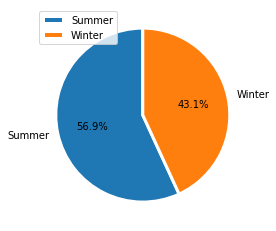

In [33]:
summer_winter=complete[['Year','Season']].drop_duplicates().sort_values(by='Year',ascending=False)
x_ys=np.array(summer_winter['Season'].value_counts())
plt.pie(x_ys,labels=["Summer","Winter"],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%', startangle=90)

plt.legend()
plt.show()

As we know we have two kinds of Season (Summer and Winter), by this graph almost 60% for our data is belong to summer games and the other 40% belongs to winter games.
let's check how many summer and winter olympic games we have

In [34]:
# A function with which we can add exact numbers to graphs
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i],ha='center',fontweight='bold')

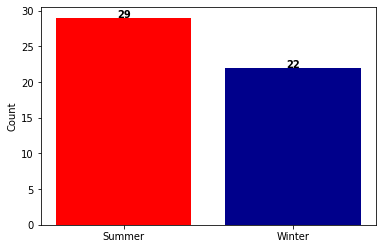

In [35]:
plt.bar(['Summer','Winter'],summer_winter['Season'].value_counts(),color=['red','darkblue'])
add_value_label([0,1],[summer_winter['Season'].value_counts()[0],summer_winter['Season'].value_counts()[1]])    
plt.ylabel('Count')
plt.show()

In [36]:
sum_games=summer_winter['Season'].value_counts()[0]
winter_games=summer_winter['Season'].value_counts()[1]
print('In total we have {} games , {} from them are Summer games and the rest {} Winter games'.format(sum_games+winter_games,sum_games,winter_games))

In total we have 51 games , 29 from them are Summer games and the rest 22 Winter games


### Let's check what can we leran form the division between men and women.

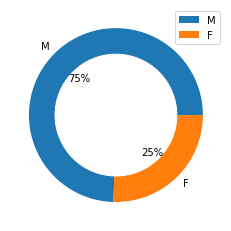

In [37]:
male_femals=complete[['Name','Sex']].drop_duplicates()
plt.pie(np.array(male_femals['Sex'].value_counts()),labels=["M","F"],autopct='%1.0f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.legend()
plt.show()

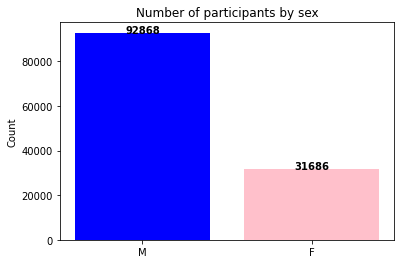

In [38]:
plt.bar(['M','F'],male_femals['Sex'].value_counts(),color=['blue','pink'])

values=[np.array(male_femals['Sex'].value_counts())[0],np.array(male_femals['Sex'].value_counts())[1]]
add_value_label([0,1],values)    
plt.ylabel('Count')
plt.title("Number of participants by sex")
plt.show()

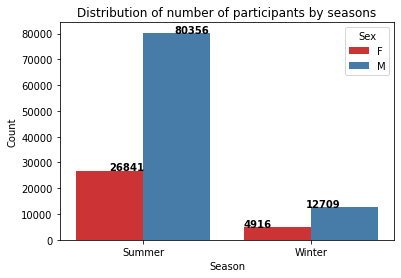

In [39]:
# A function with which we can add exact numbers to graphs
def add_value_label_1(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text((i/2.555)-0.1,y_list[i],y_list[i],ha='center',fontweight='bold')

sex_season=complete[['Name','Sex','Season']].drop_duplicates().groupby(by=['Sex','Season']).agg('count').reset_index()
sex_season.rename(columns={'Name':'Count'},inplace=True)

sns.barplot(x = 'Season', y = 'Count' , hue = "Sex", data = sex_season,palette="Set1").set_title('Distribution of number of participants by seasons')
add_value_label_1([0,1,2,3],[sex_season.iloc[0]['Count'],sex_season.iloc[2]['Count'],sex_season.iloc[1]['Count'],sex_season.iloc[3]['Count']])    
plt.show()

In [40]:
men=male_femals['Sex'].value_counts()[0]
woman=male_femals['Sex'].value_counts()[1]
print('From our data we can learn that so far {} mens have compet\n of these, {} in summer games and {} in the winter games'.\
      format(men,sex_season.iloc[2]['Count'],sex_season.iloc[3]['Count']))
print('')
print('And totally {} woman compet of these, {} in summer games and {} in the winter games'.\
      format(woman,sex_season.iloc[0]['Count'],sex_season.iloc[1]['Count']))

From our data we can learn that so far 92868 mens have compet
 of these, 80356 in summer games and 12709 in the winter games

And totally 31686 woman compet of these, 26841 in summer games and 4916 in the winter games


### Let's check what can we leran about the ages of the participants

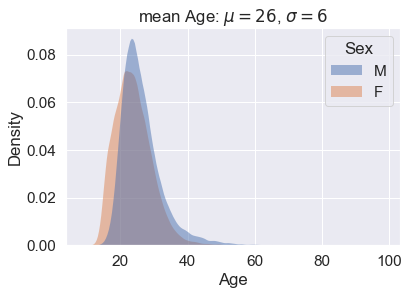

In [41]:
sns.set(font_scale = 1.4, style = 'darkgrid')
sns.kdeplot(data=complete[['Sex','Age']],x="Age",hue="Sex" ,shade=True, common_norm=False,alpha=.5, linewidth=0)

mean = complete[['Sex','Age']]['Age'].mean()
std =  complete[['Sex','Age']]['Age'].std()
plt.title(r'mean Age: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')
plt.show()

Let's extract interesting details from the data

## The oldest man in the games 

In [42]:
complete.where(complete.Sex=='M')[complete.Age==complete.Age.max()][['Name','Age','Country','Games','Sport','Medal']]

Name   Age        Country        Games  \
32196  John Quincy Adams Ward  97.0  United States  1928 Summer   

                  Sport     Medal  
32196  Art Competitions  No_Medal

## The oldest women in the games 

In [43]:
complete[complete.Age==complete[complete.Sex=='F']['Age'].max()]\
[['Name','Age','Country','Games','Sport','Medal']].sort_values('Games').drop_duplicates()

Name   Age        Country  \
59846   Ernestine Lonie Ernesta Robert-Mrignac  74.0         France   
12246              Egbert Rubertus Deck Schaap  74.0    Netherlands   
15697                      Frank Weston Benson  74.0  United States   
153988                      Godefroid Devreese  74.0        Belgium   
58929                           Auguste Perret  74.0         France   

              Games             Sport     Medal  
59846   1924 Summer  Art Competitions  No_Medal  
12246   1936 Summer  Art Competitions  No_Medal  
15697   1936 Summer  Art Competitions  No_Medal  
153988  1936 Summer  Art Competitions  No_Medal  
58929   1948 Summer  Art Competitions  No_Medal

## The youngest man in the games 

In [44]:
complete.where(complete.Sex=='M')[complete.Age==complete.Age.min()][['Name','Age','Country','Games','Sport']]

Name   Age Country        Games       Sport
101525  Dimitrios Loundras  10.0  Greece  1896 Summer  Gymnastics

## The youngest women in the games 

In [45]:
len_age=len(complete[complete.Age==complete[complete.Sex=='F']['Age'].min()][['Name','Age','Country','Games','Sport']].sort_values('Games').drop_duplicates())
print('There is '+str(len_age)+' women who were considered the youngest when they age were '+str(complete[complete.Sex=='F']['Age'].min())+' years old')

There is 9 women who were considered the youngest when they age were 11.0 years old


### Height VS Weight

In [46]:
male_summer=complete[complete.Sex=='M'][complete.Season=='Summer']
male_Winter=complete[complete.Sex=='M'][complete.Season=='Winter']

female_summer=complete[complete.Sex=='F'][complete.Season=='Summer']
female_winter=complete[complete.Sex=='F'][complete.Season=='Winter']

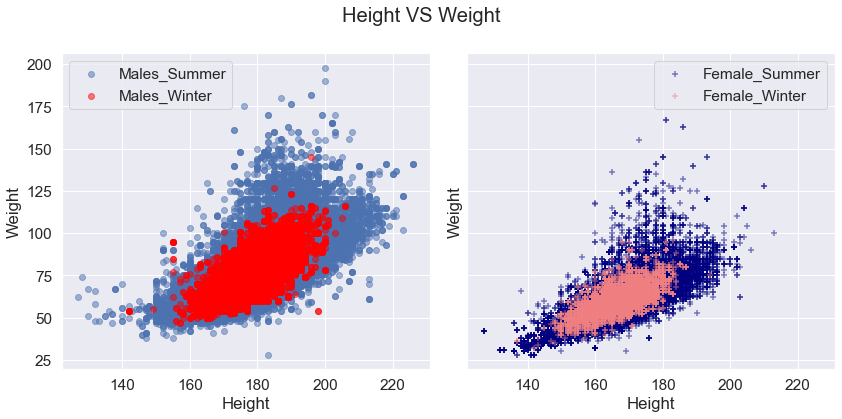

In [47]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True , figsize = (12, 6))
ax1, ax2 = ax
ax1.scatter(male_summer['Height'],male_summer['Weight'],alpha=.5,label='Males_Summer')
ax1.scatter(male_Winter['Height'],male_Winter['Weight'],alpha=.5,color='red',label='Males_Winter')
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')
ax1.legend()

ax2.scatter(female_summer['Height'],female_summer['Weight'],alpha=.5,marker='+',color='navy',label='Female_Summer')
ax2.scatter(female_winter['Height'],female_winter['Weight'],alpha=.5,marker='+',color='lightcoral',label='Female_Winter')
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')
ax2.legend()

fig.suptitle('Height VS Weight')
fig.tight_layout()
plt.show()

According to this plots we can see that the AVG competitor weight would be around 75 KG and AVG heigth of 1.80 m. 

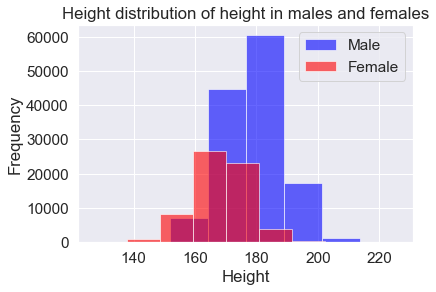

In [48]:
complete[complete.Sex=='M']['Height'].plot(kind='hist', bins=8, alpha=.6, color='blue')
complete[complete.Sex=='F']['Height'].plot(kind='hist', bins=8, alpha=.6, color='red')
plt.title("Height distribution of height in males and females")
plt.xlabel("Height")
plt.legend(["Male","Female"])
plt.show()

## The tallest man in the games 

In [49]:
complete.where(complete.Sex=='M')[complete.Height==complete.Height.max()][['Name','Height','Country','Games','Sport','Medal']][:1]

Name  Height Country        Games       Sport     Medal
4242  Yao Ming   226.0   China  2000 Summer  Basketball  No_Medal

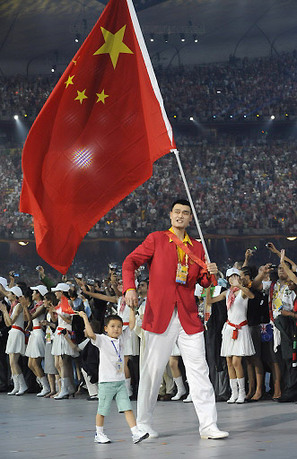

In [50]:
len1=len(complete[complete.Height==complete[complete.Sex=='F']['Height'].max()]\
    [['Name','Height','Country','Games','Sport']].sort_values('Games').drop_duplicates())
print('There is '+str(len1)+' women who were considered the tallest with a height of '+str(complete[complete.Sex=='F']['Height'].max())+' cm')

There is 47 women who were considered the tallest with a height of 213.0 cm


## The samllest pepole in the games 

In [51]:
complete[complete.Height==complete.Height.min()][['Name','Sex','Age','Height','Country','Games','Sport','Medal']][-2:]

Name Sex   Age  Height Country        Games  \
106217        Rosario Briones   F  15.0   127.0  Mexico  1968 Summer   
248845  Lyton Levison Mphande   M  25.0   127.0  Malawi  1988 Summer   

             Sport     Medal  
106217  Gymnastics  No_Medal  
248845      Boxing  No_Medal

###  what can we leran from the weight of the participants

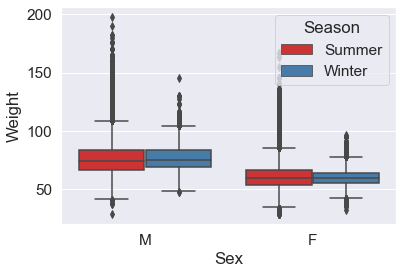

In [52]:
sex_weight=complete[['Sex','Weight','Season']].dropna()
sns.boxplot(x='Sex',y='Weight',hue='Season',data=sex_weight,palette="Set1")
plt.show()

## The thinnest pepole in the games 

In [53]:
complete[complete.Weight==complete.Weight.min()][['Name','Sex','Age','Weight','Country','Games','Sport','Medal']].drop_duplicates()

Name Sex   Age  Weight        Country  \
3555                Wang Xin (Ruoxue-)   F  15.0    28.0          China   
3556                Wang Xin (Ruoxue-)   F  15.0    28.0          China   
33338   Albert Ferdinand "Al" Zerhusen   M  24.0    28.0  United States   
170788                   Kana Yamawaki   F  16.0    28.0          Japan   
210364                    Anita Jokiel   F  13.0    28.0         Poland   

              Games       Sport     Medal  
3555    2008 Summer      Diving    Bronze  
3556    2008 Summer      Diving      Gold  
33338   1956 Summer    Football  No_Medal  
170788  2000 Summer  Gymnastics  No_Medal  
210364  1980 Summer  Gymnastics  No_Medal

## The heaviest pepole in the games 

In [54]:
complete[complete.Weight==complete.Weight.max()][['Name','Sex','Age','Weight','Country','Games','Sport','Medal']].drop_duplicates()

Name Sex   Age  Weight Country        Games Sport  \
66990  Aytami Ruano Vega   M  27.0   198.0   Spain  2004 Summer  Judo   

          Medal  
66990  No_Medal

### Age and BMI

In [55]:
import math

tmp0=complete[complete.where(complete.Sex=='M').notnull() & complete.where(complete.Season=='Summer').notnull()]
tmp1=tmp0[['Year','Age','Weight','Height']].dropna()
tmp1['Height']=tmp1['Height']/100
tmp_M=round(tmp1.groupby('Year').agg('mean'))
tmp_M['Mean_BMI']=tmp_M['Weight']/pow(tmp_M['Height'],2)

tmp01=complete[complete.where(complete.Sex=='F').notnull() & complete.where(complete.Season=='Summer').notnull()]
tmp11=tmp01[['Year','Age','Weight','Height']].dropna()
tmp11['Height']=tmp11['Height']/100
tmp_F=round(tmp11.groupby('Year').agg('mean'))
tmp_F['Mean_BMI']=tmp_F['Weight']/pow(tmp_F['Height'],2)

tmp_mf_age=pd.DataFrame((tmp_M['Age']+tmp_F['Age'])/2)
tmp_mf_bmi=pd.DataFrame((tmp_M['Mean_BMI']+tmp_F['Mean_BMI'])/2)

#------------------------#
tmp_w0=complete[complete.where(complete.Sex=='M').notnull() & complete.where(complete.Season=='Winter').notnull()]
tmp_w1=tmp_w0[['Year','Age','Weight','Height']].dropna()
tmp_w1['Height']=tmp_w1['Height']/100
tmp_w_M=round(tmp_w1.groupby('Year').agg('mean'))
tmp_w_M['Mean_BMI']=tmp_w_M['Weight']/pow(tmp_w_M['Height'],2)

tmp_w01=complete[complete.where(complete.Sex=='F').notnull() & complete.where(complete.Season=='Winter').notnull()]
tmp_w11=tmp_w01[['Year','Age','Weight','Height']].dropna()
tmp_w11['Height']=tmp_w11['Height']/100
tmp_w_F=round(tmp_w11.groupby('Year').agg('mean'))
tmp_w_F['Mean_BMI']=tmp_w_F['Weight']/pow(tmp_w_F['Height'],2)

tmp_mf_age_w=pd.DataFrame((tmp_w_M['Age']+tmp_w_F['Age'])/2)
tmp_mf_bmi_w=pd.DataFrame((tmp_w_M['Mean_BMI']+tmp_w_F['Mean_BMI'])/2)

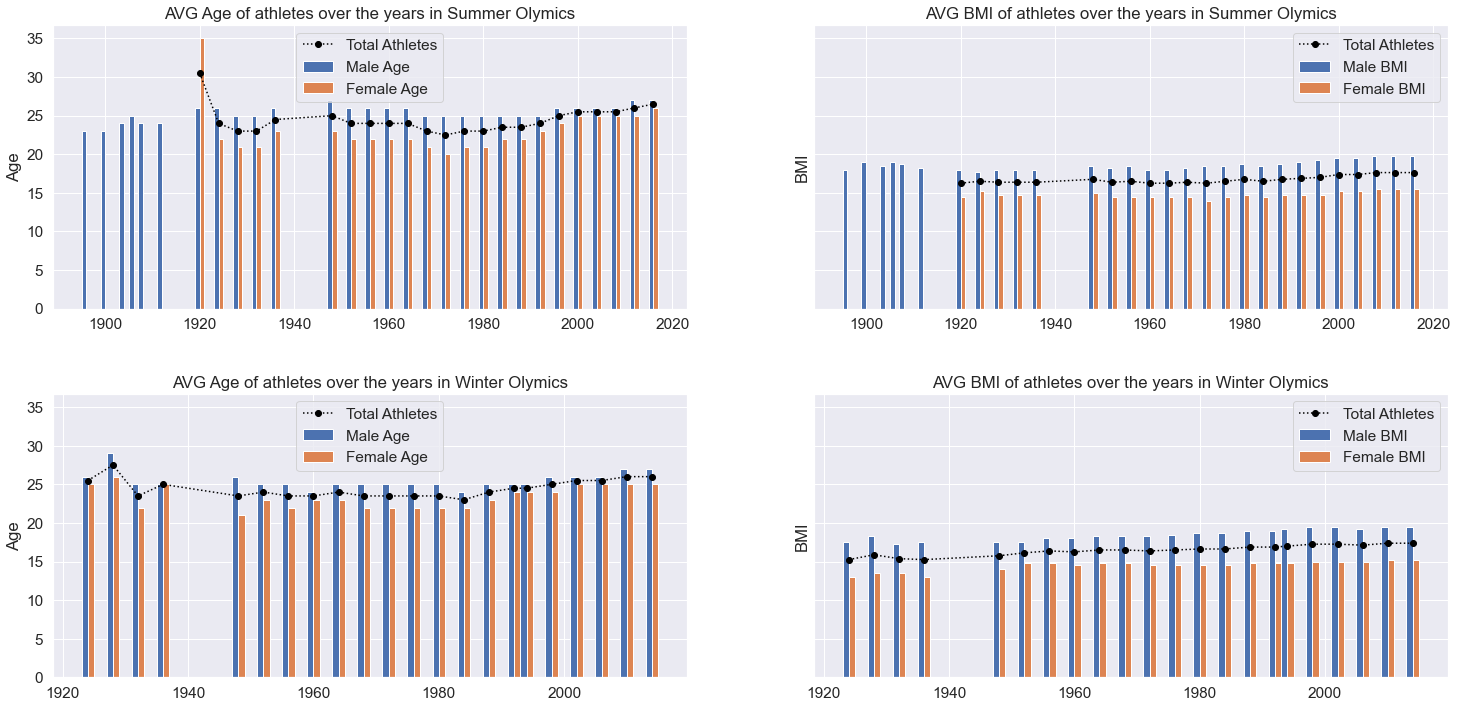

In [56]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 12), sharey = True)
fig.subplots_adjust(hspace = 0.3)
#-------------------------#
ax1.bar(tmp_M.index.values, tmp_M['Age'], width = -1, align = 'edge', label = 'Male Age')
ax1.bar(tmp_F.index.values, tmp_F['Age'], width = 1, align = 'edge', label = 'Female Age')
ax1.plot(tmp_mf_age.index.values, tmp_mf_age['Age'], linestyle = ':', color = 'black', label = 'Total Athletes',marker = 'o')

ax1.set_title('AVG Age of athletes over the years in Summer Olymics')
ax1.set_ylabel('Age')
ax1.legend(loc = 'best')
#-------------------------#
ax2.bar(tmp_M.index.values, tmp_M['Mean_BMI'], width = -1, align = 'edge', label = 'Male BMI')
ax2.bar(tmp_F.index.values, tmp_F['Mean_BMI'], width = 1, align = 'edge', label = 'Female BMI')
ax2.plot(tmp_mf_bmi.index.values, tmp_mf_bmi['Mean_BMI'], linestyle = ':', color = 'black', label = 'Total Athletes',marker = 'o')

ax2.set_title('AVG BMI of athletes over the years in Summer Olymics')
ax2.set_ylabel('BMI')
ax2.legend(loc = 'best')
#-------------------------#
ax3.bar(tmp_w_M.index.values, tmp_w_M['Age'], width = -1, align = 'edge', label = 'Male Age')
ax3.bar(tmp_w_F.index.values, tmp_w_F['Age'], width = 1, align = 'edge', label = 'Female Age')
ax3.plot(tmp_mf_age_w.index.values, tmp_mf_age_w['Age'], linestyle = ':', color = 'black', label = 'Total Athletes',marker = 'o')

ax3.set_title('AVG Age of athletes over the years in Winter Olymics')
ax3.set_ylabel('Age')
ax3.legend(loc = 'best')
#-------------------------#
ax4.bar(tmp_w_M.index.values, tmp_w_M['Mean_BMI'], width = -1, align = 'edge', label = 'Male BMI')
ax4.bar(tmp_w_F.index.values, tmp_w_F['Mean_BMI'], width = 1, align = 'edge', label = 'Female BMI')
ax4.plot(tmp_mf_bmi_w.index.values, tmp_mf_bmi_w['Mean_BMI'], linestyle = ':', color = 'black', label = 'Total Athletes',marker = 'o')

ax4.set_title('AVG BMI of athletes over the years in Winter Olymics')
ax4.set_ylabel('BMI')
ax4.legend(loc = 'best')
plt.show()

## Intermediate insights

The main goal was to check the ages and bmi of the contestants over the years but using the graphs you can see more insights

1)Women only started competing in 1920.

2)It can be seen that apart from the first Olympics the ages of the men and their bmi are higher than that of the women.

3)There were no Olympic Games between 1936 and 1952.

4)The Winter Games began in 1920.

## Host country advantage

The colum of the city gives us cities. in order to leran new thing from this colum let's change her to Host country and instead the city we will write her country.

In [57]:
complete['City'].replace({"Barcelona":"Spain","London":"United Kingdom","Sydney":"Australia","Athina":"Greece","Rio de Janeiro":"Brazil","Torino":"Italy","Nagano":"Japan"
                          ,"Salt Lake City":"United States","Atlanta":"United States","Beijing":"China","Sochi":"Russia","Los Angeles":"United States","Berlin":"Germany"
                         ,"Lake Placid":"United States","Sarajevo":"Serbia","Seoul":"South Korea","Vancouver":"Canada","Albertville":"France","Lillehammer":"Norway","Calgary":"Canada"
                         ,"Lillehammer":"Norway","Calgary":"Canada","Helsinki":"Pinland","Antwerpen":"Belgium","Paris":"France","Munich":"Germany","Amsterdam":"Holand","Stockholm":"Sweden"
                         ,"Roma":"Italy","Melbourne":"Australia","Tokyo":"Japan","Montreal":"Australia","Mexico City":"Mexico","Moskva":"Russia","Grenoble":"France","Innsbruck":"Austria"
                         ,"Sankt Moritz":"Switzerland","Oslo":"Norway","Squaw Valley":"United States","Sapporo":"Japan","Garmisch-Partenkirchen":"Germany"
                         ,"Cortina d'Ampezzo":"Italy","St. Louis":"United States"},inplace=True)
complete.rename(columns={'City':'Host_Country'},inplace=True)

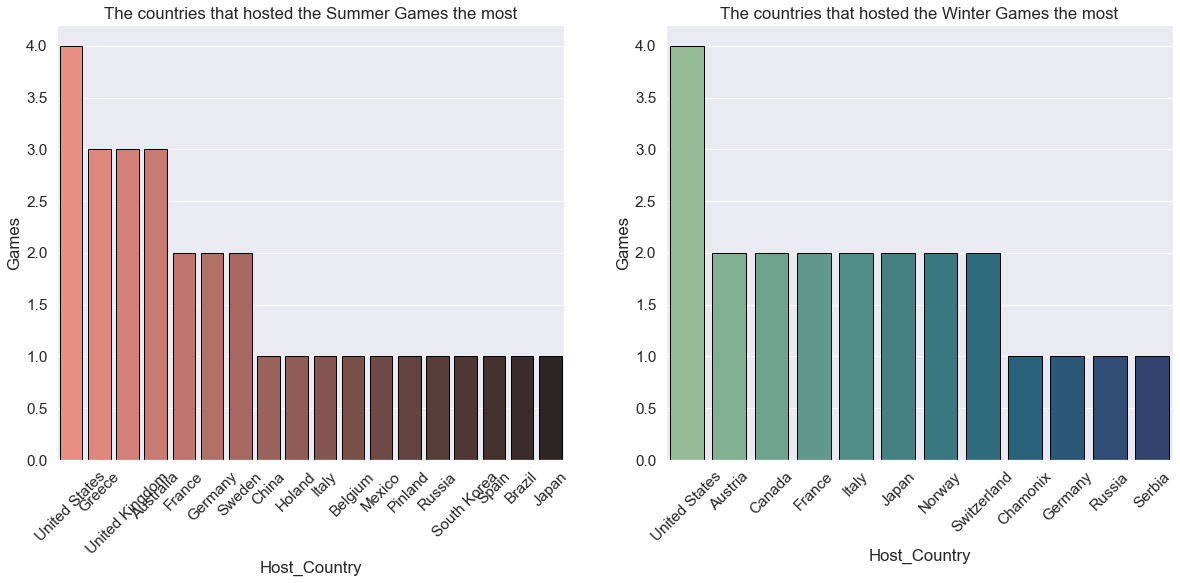

In [58]:
summer_host=complete[complete.Season=='Summer'][['Games','Host_Country']].drop_duplicates()
winter_host=complete[complete.Season=='Winter'][['Games','Host_Country']].drop_duplicates()

arr_host_s=summer_host.groupby('Host_Country').agg('count').reset_index()
arr_host_w=winter_host.groupby('Host_Country').agg('count').reset_index()

plt.rcParams['figure.figsize'] = [20,8]
fig, ax = plt.subplots(1, 2)

sns_1=sns.barplot(x='Host_Country',y='Games',data=arr_host_s.sort_values(by='Games',ascending=False),edgecolor = 'black',ax=ax[0],palette='dark:salmon_r')
plt.setp(sns_1.get_xticklabels(), rotation = 45);
sns_2=sns.barplot(x='Host_Country',y='Games',data=arr_host_w.sort_values(by='Games',ascending=False),edgecolor = 'black',ax=ax[1],palette='crest')
plt.setp(sns_2.get_xticklabels(), rotation = 45);

sns_1.set_title('The countries that hosted the Summer Games the most')
sns_2.set_title('The countries that hosted the Winter Games the most')
plt.show()

## We will check which are the countries with the most Olympic medals!

<div> 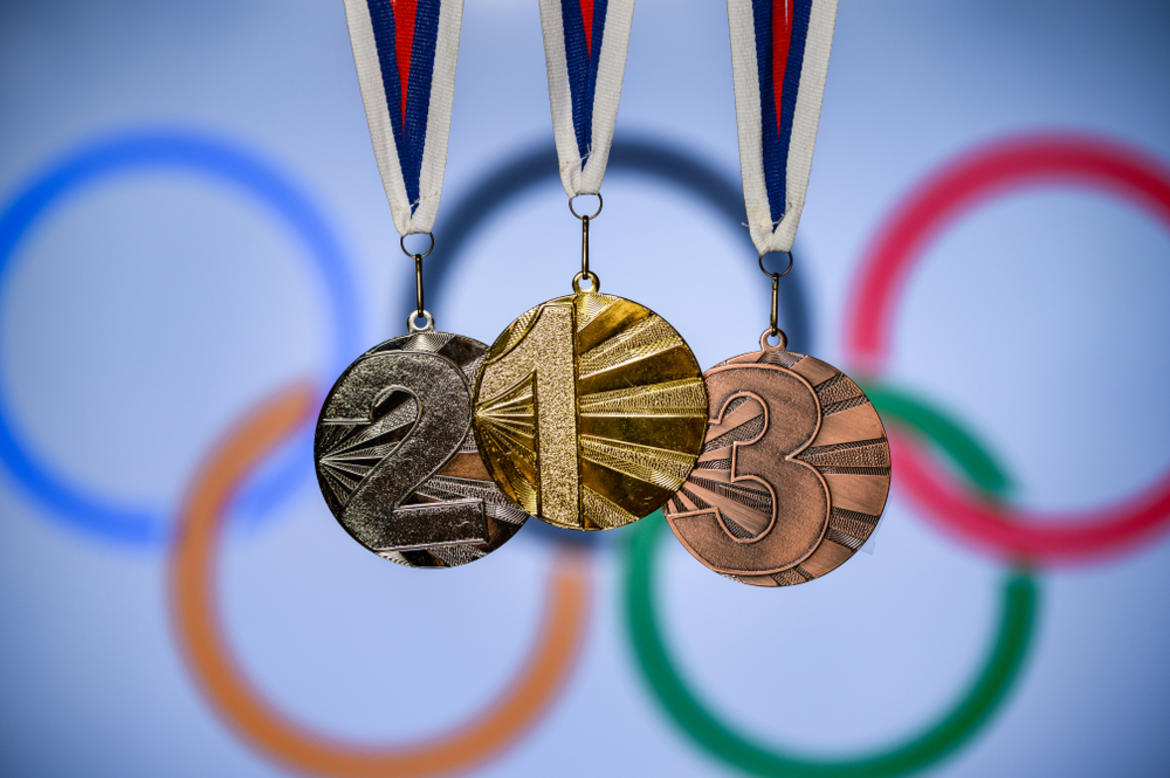</div> 

In [59]:
#Let's create a column that captures whether or not a medal was won! It would be 1 if Medal column says Gold, Silver or Bronze and 0 otherwise.

complete['Gold']=np.where(complete.loc[:,'Medal']=='Gold',1,0)
complete['Silver']=np.where(complete.loc[:,'Medal']=='Silver',1,0)
complete['Bronze']=np.where(complete.loc[:,'Medal']=='Bronze',1,0)
complete['Medal_Won']=np.where(complete.loc[:,'Medal']=='No_Medal',0,1)

### We will examine who are the athletes with the most Olympic medals!

In [60]:
most_medals=complete[complete.Medal!='No_Medal'][['Name','Country','Sport','Season','Sex','Gold','Silver','Bronze']]
most_medals=most_medals.groupby(['Name','Country','Sport','Season','Sex']).agg('sum').reset_index()
most_medals['Won']=most_medals['Gold']+most_medals['Silver']+most_medals['Bronze']

name_year=complete[['Name','Year']]
name_year=name_year.groupby('Name').agg(['min','max']).droplevel(level=0,axis=1).reset_index()

count_games=complete[['Name','Games']].drop_duplicates()
count_games=count_games.groupby('Name').agg('count').reset_index()
count_games=count_games.merge(name_year,how='inner',on='Name')

most_medals=most_medals.merge(count_games,how='inner',on='Name')
most_medals.rename(columns={'min':'First_Year','max':'Last_Year'},inplace=True)
right_order=["Name","Country","Sport","Season","Sex","First_Year","Last_Year","Games","Bronze","Silver","Gold","Won"]
most_medals=most_medals.reindex(columns=right_order)
most_medals.sort_values(by='Won',ascending=False).head(10)

Name        Country       Sport  Season  \
17179             Michael Fred Phelps, II  United States    Swimming  Summer   
14539  Larysa Semenivna Latynina (Diriy-)         Russia  Gymnastics  Summer   
18345        Nikolay Yefimovich Andrianov         Russia  Gymnastics  Summer   
5781                  Edoardo Mangiarotti          Italy     Fencing  Summer   
23094                         Takashi Ono          Japan  Gymnastics  Summer   
3047          Borys Anfiyanovych Shakhlin         Russia  Gymnastics  Summer   
18647                 Ole Einar Bjrndalen         Norway    Biathlon  Winter   
21746                          Sawao Kato          Japan  Gymnastics  Summer   
19047                Paavo Johannes Nurmi        Finland   Athletics  Summer   
2887               Birgit Fischer-Schmidt        Germany    Canoeing  Summer   

      Sex  First_Year  Last_Year  Games  Bronze  Silver  Gold  Won  
17179   M        2000       2016      5       2       3    23   28  
14539   F        1956       1964      3       4       5     9   18  
18345   M        1972       1980      3       3       5     7   15  
5781    M        1936       1960      5       2       5     6   13  
23094   M        1952       2008      5       4       4     5   13  
3047    M        1956       1964      3       2       4     7   13  
18647   M        1994       2014      6       1       4     8   13  
21746   M        1968       1976      3       1       3     8   12  
19047   M        1920       1928      3       0       3     9   12  
2887    F        1980       2004      6       0       4     8   12

## The competitors with the most performances

In [61]:
most_medals.sort_values(by='Games',ascending=False).head()

Name  Country          Sport  Season Sex  First_Year  \
10238         Ian Millar   Canada  Equestrianism  Summer   M        1972   
188    Afanasijs Kuzmins   Latvia       Shooting  Summer   M        1976   
189    Afanasijs Kuzmins   Russia       Shooting  Summer   M        1976   
10149   Hubert Raudaschl  Austria        Sailing  Summer   M        1964   
19833      Piero D'Inzeo    Italy  Equestrianism  Summer   M        1948   

       Last_Year  Games  Bronze  Silver  Gold  Won  
10238       2012     10       0       1     0    1  
188         2012      9       0       1     0    1  
189         2012      9       0       0     1    1  
10149       1996      9       0       2     0    2  
19833       1976      8       4       2     0    6

<div> 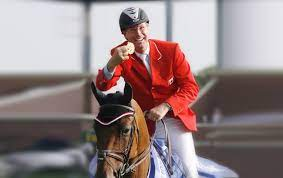</div> 

Let's examine what the correlation is between the number of participations of a contestant in the Olympics and the number of medals

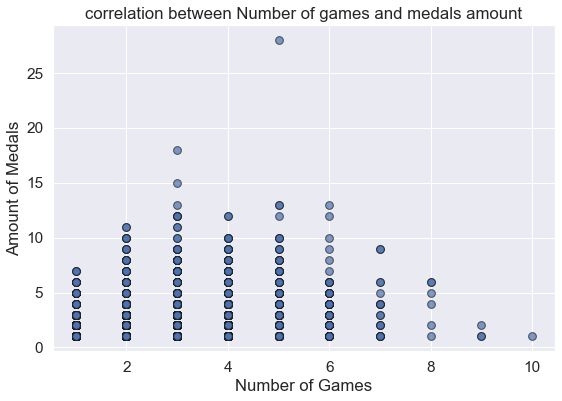

In [62]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(most_medals['Games'], most_medals['Won'], s=60, alpha=0.7, edgecolors="k")
plt.xlabel('Number of Games')
plt.ylabel('Amount of Medals')
plt.title("correlation between Number of games and medals amount")
plt.show()

In [63]:
most_medals[['Games','Won']].corr()

Games       Won
Games  1.000000  0.429565
Won    0.429565  1.000000

In [64]:
print("The correlation between Games and Won is {} So we can determine it is not correlated".format(round(most_medals[['Games','Won']].corr()['Won'][0],2)))

The correlation between Games and Won is 0.43 So we can determine it is not correlated


## The men in summer games with the most gold medals

In [65]:
arr_sm_gold=complete[complete.Gold==1][complete.Sex=='M'][complete.Season=='Summer'][['Name','Country','Sport','Gold']].groupby(['Name','Country','Sport']).agg('sum').reset_index()
arr_sm_gold.rename(columns={'Gold':'Total_gold_medals'},inplace=True)
arr_sm_gold.sort_values(by='Total_gold_medals',ascending=False).head(3)

Name        Country      Sport  Total_gold_medals
4056      Michael Fred Phelps, II  United States   Swimming                 23
4776  Raymond Clarence "Ray" Ewry  United States  Athletics                 10
4471         Paavo Johannes Nurmi        Finland  Athletics                  9

<div> 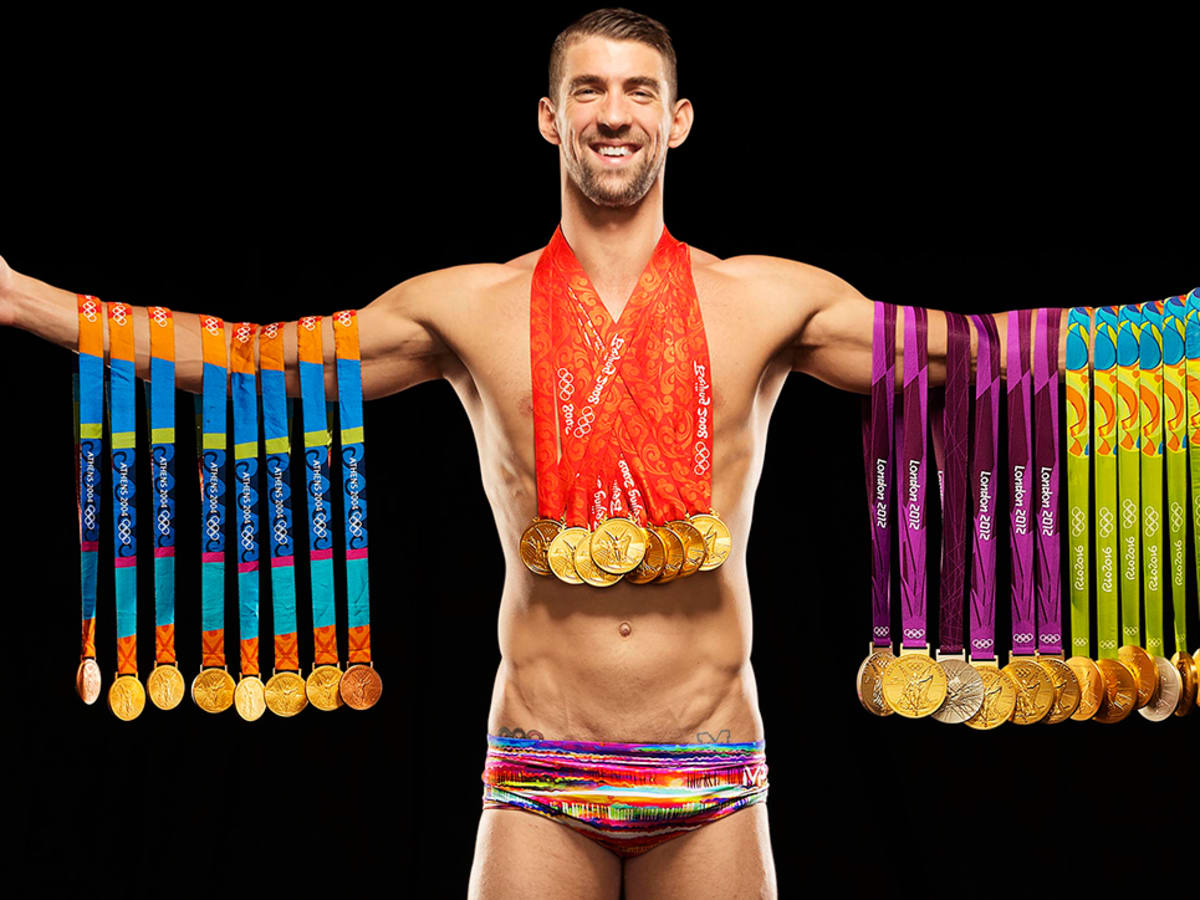</div> 

## The women in summer games with the most gold medals

In [66]:
arr_fs_gold=complete[complete.Gold==1][complete.Sex=='F'][complete.Season=='Summer'][['Name','Country','Sport','Gold']].groupby(['Name','Country','Sport']).agg('sum').reset_index()
arr_fs_gold.rename(columns={'Gold':'Total_gold_medals'},inplace=True)
arr_fs_gold.sort_values(by='Total_gold_medals',ascending=False).head(3)

Name        Country  \
1046               Larysa Semenivna Latynina (Diriy-)         Russia   
197                            Birgit Fischer-Schmidt        Germany   
817   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  United States   

           Sport  Total_gold_medals  
1046  Gymnastics                  9  
197     Canoeing                  8  
817     Swimming                  8

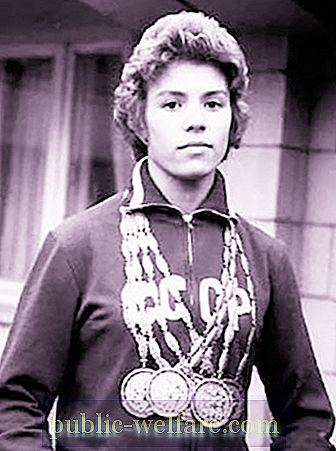

##  The mens in winter games with the most gold medals

In [67]:
arr_sm_gold=complete[complete.Gold==1][complete.Sex=='M'][complete.Season=='Winter'][['Name','Country','Sport','Gold']].groupby(['Name','Country','Sport']).agg('sum').reset_index()
arr_sm_gold.rename(columns={'Gold':'Total_gold_medals'},inplace=True)
arr_sm_gold.sort_values(by='Total_gold_medals',ascending=False).head(3)

Name  Country                 Sport  \
663          Ole Einar Bjrndalen   Norway              Biathlon   
844    Thomas Alsgaard (Alsgrd-)   Norway  Cross Country Skiing   
98   Arnold Clas Robert Thunberg  Finland         Speed Skating   

     Total_gold_medals  
663                  8  
844                  5  
98                   5

<div> 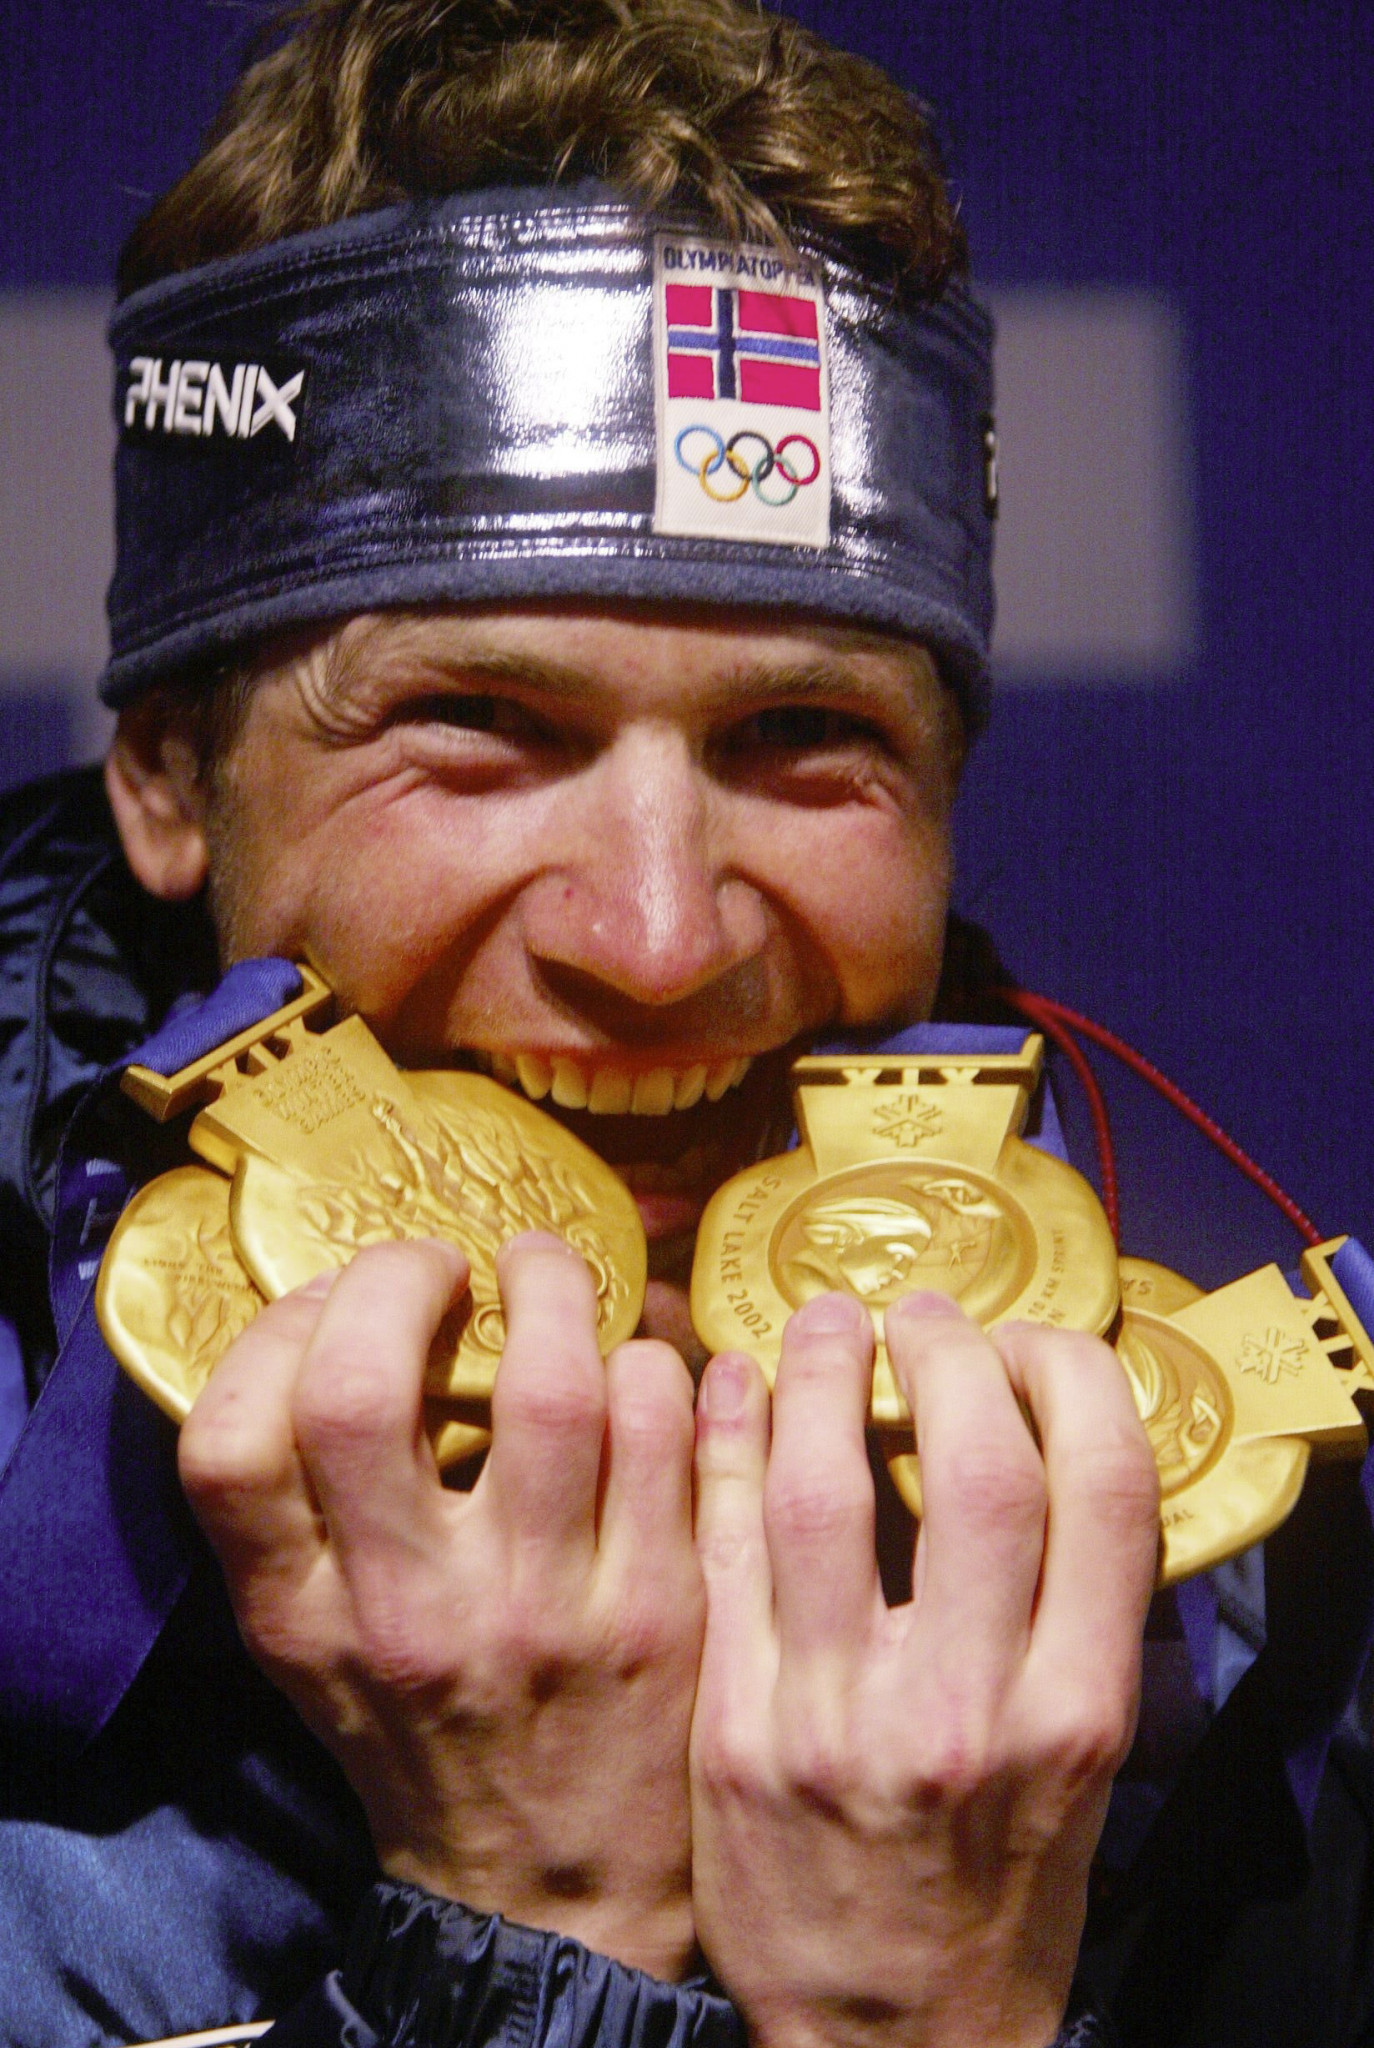</div> 

## The women in winter games with the most gold medals

In [68]:
arr_fw_gold=complete[complete.Gold==1][complete.Sex=='F'][complete.Season=='Winter'][['Name','Country','Sport','Gold']].groupby(['Name','Country','Sport']).agg('sum').reset_index()
arr_fw_gold.rename(columns={'Gold':'Total_gold_medals'},inplace=True)
arr_fw_gold.sort_values(by='Total_gold_medals',ascending=False).head(3)

Name        Country  \
226  Lidiya Pavlovna Skoblikova (-Polozkova)         Russia   
259                             Marit Bjrgen         Norway   
55       Bonnie Kathleen Blair (-Cruikshank)  United States   

                    Sport  Total_gold_medals  
226         Speed Skating                  6  
259  Cross Country Skiing                  6  
55          Speed Skating                  5

<div> 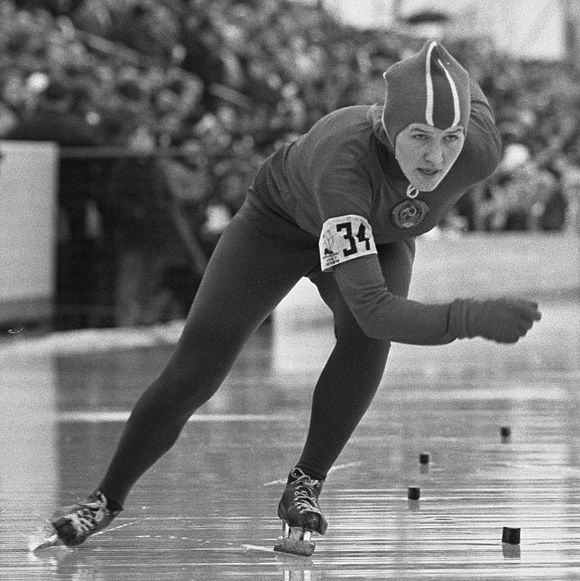</div> 

We will check which are the countries with the most Olympic medals!
It is worthwhile to get to that we will need to allow the amount of medals each country but first we will differentiate between individual medals and group medals.
In the data each line indicates an athlete who participated in the competition but is a beauty several times participating in several different assignments.

For example, the basketball group in this medal is considered a country medal, but in one data that the group is made up of 12 athletes and each athlete wins a medal in this category, then if we receive we will receive 12 medals and this is a mistake in the data that needs to be corrected. 

In [69]:
identify_team_events = pd.pivot_table(complete,
                                      index=['Country','Games'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                      fill_value = 0).drop('No_Medal', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold']|identify_team_events['Silver']|identify_team_events['Bronze'] > 1 , :]
team_sports = identify_team_events['Games'].unique()

The list below gives names of each event where in a single edition multiple golds were given. Although these are recognised as team events, they are not actually team events. Some examples include :
1. Gymnastics Women's Balance Beam
2. Gymnastics Men's Horizontal Bar
3. Swimming Women's 100 metres Freestyle
4. Swimming Men's 50 metres Freestyle

Upon analysis, I found that these are actually single events but because two athletes had the same score/time, both were awarded the gold medal. We need to remove these events from the list of team sports

In [70]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

The next thing we need to do is add a column in the dataset that correctly identifies whether the event in the given record is a team event or a single event. We then use this column to correctly calculate the medal tally for each country.

In [71]:
# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = complete['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

medal_mask = complete['Medal_Won'] == 1
complete['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)
complete['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)
complete['Event_Category'] = complete['Single_Event'] + complete['Team_Event']

Now, its time to calculate medal tally agnostic of the team size - one gold means one gold for an event. To do this we divide the number of medals by the count of winning team members. How do we get the team members? Sum of event_category column should do that for us!

In [72]:
medal_tally_agnostic = complete.\
groupby(['Games', 'Country','Sport', 'Event'])[['Bronze','Silver','Gold','Medal_Won', 'Event_Category']].\
agg('sum').reset_index()

medal_tally_agnostic['Medal_Won_Corrected'] = medal_tally_agnostic['Medal_Won']/medal_tally_agnostic['Event_Category']

Now after we calculated the correct number of medals we will check for each game how many medals each team has achieved by medals.

In [73]:
medal_tally= medal_tally_agnostic.groupby(['Games','Country'])[['Bronze','Silver','Gold','Medal_Won_Corrected']].agg('sum').reset_index()
medal_tally_a= medal_tally_agnostic.groupby('Country')[['Bronze','Silver','Gold','Medal_Won_Corrected']].agg('sum').reset_index()
medal_tally.head()

Games    Country  Bronze  Silver  Gold  Medal_Won_Corrected
0  1896 Summer  Australia       1       0     2                  3.0
1  1896 Summer    Austria       2       1     2                  5.0
2  1896 Summer    Denmark       3       2     1                  6.0
3  1896 Summer     France       2       4     5                  8.0
4  1896 Summer    Germany       2       5    25                 12.0

checking also the amount of games for each country to see if there is corrlection between thier experince (no_of_games) and the total amount of medals that they achived.
it should be simelir to our previous checking between experience of a competitor against the amount of medals he brought.
We have seen that for a single competitor there was no correlation, we will check if this is also true at the level of an entire team.

In [74]:
medal_tally_g=medal_tally.groupby('Country').agg({'Games':'count','Medal_Won_Corrected':'sum'})
medal_tally_g.sort_values(by='Medal_Won_Corrected',ascending=False)
medal_tally_g.rename(columns={'Games':'no_of_games'},inplace=True)
medal_tally_g.reset_index()

medal_tally_t=pd.merge(medal_tally_g,medal_tally_a,on='Country')
medal_tally_t=medal_tally_t[['Country','no_of_games','Bronze','Silver','Gold','Medal_Won_Corrected_x']].sort_values(by='Medal_Won_Corrected_x',ascending=False)
medal_tally_t.rename(columns={'Medal_Won_Corrected_x':'Medal_Won_Corrected'},inplace=True)
medal_tally_t.head()

Country  no_of_games  Bronze  Silver  Gold  Medal_Won_Corrected
168   United States           50    1358    1641  2638               2110.0
130          Russia           34    1097    1099  1472               1522.0
62          Germany           45    1027    1001  1142               1337.0
167  United Kingdom           51     651     739   678                790.0
58           France           51     666     610   501                767.0

In [75]:
medal_tally_t[['no_of_games','Medal_Won_Corrected']].corr()

no_of_games  Medal_Won_Corrected
no_of_games             1.000000             0.628133
Medal_Won_Corrected     0.628133             1.000000

In [76]:
print("The correlation between No_of_games and Medal Won are {} So we can determine it is correlated! ".format(round(medal_tally_t[['no_of_games','Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0],2)))

The correlation between No_of_games and Medal Won are 0.63 So we can determine it is correlated! 


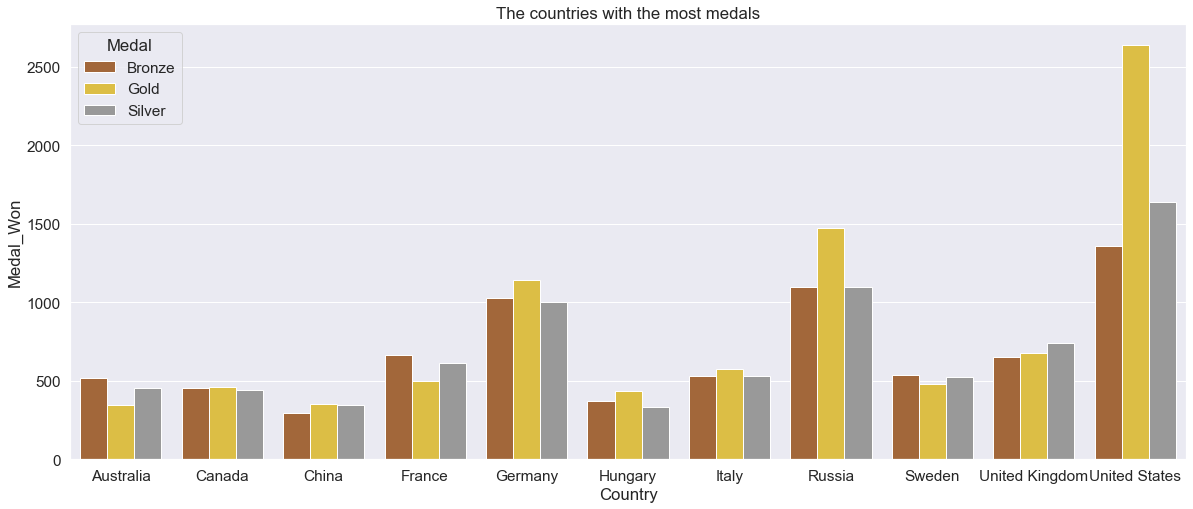

In [77]:
country_medal=complete[complete.Medal!='No_Medal'][['Country','Medal','Medal_Won']].groupby(['Country','Medal']).agg('sum')
country_medal=country_medal.reset_index()
most_medals=medal_tally_t.Country[:11].to_list()
boolean_county_medal = country_medal.Country.isin(most_medals)
filtered_df = country_medal[boolean_county_medal]

colors = ["#b36529", "#f5cd2c","#999999"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x='Country',y='Medal_Won',hue='Medal',data=filtered_df,ci=None)
plt.title("The countries with the most medals")
plt.show()

In [78]:
def draw_map(dataset, title, colorscale,Medal,reversescale=False):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode='country names',
                z = dataset[Medal],
                text = dataset['Country'],
                autocolorscale =False,
                reversescale = reversescale,
                colorscale = colorscale,
                marker = dict( line = dict(color = 'rgb(0,0,0)',width = 0.5)),
                colorbar = dict(title = 'Medals',tickprefix = ''))
    data = [trace]
    layout = go.Layout(title = title, 
                       geo = dict(showframe = True,showlakes = False,showcoastlines = True,
                                  projection = dict(type = 'natural earth')))
    fig = dict( data=data, layout=layout )
    iplot(fig)
    plt.show()

In [79]:
draw_map(medal_tally_t, "Countries with Total Medals",'Blues','Medal_Won_Corrected')

In [80]:
draw_map(medal_tally_t, "Countries with Gold Medals",'Greens','Gold')

In [81]:
draw_map(medal_tally_t, "Countries with Silver Medals",'Greys','Silver')

In [82]:
draw_map(medal_tally_t, "Countries with Bronze Medals",'Reds','Bronze')

Now that we know how many medals each team has achieved, we will check how many teams participated in those games and how many competitors I had a division of men and women.

In [83]:
pivot_countries=pd.pivot_table(complete[['Name','Country','Year','Season','Host_Country']].drop_duplicates()
               ,index=['Year','Season','Host_Country']
               ,columns=['Country'],aggfunc=np.size,fill_value=0)

pivot_countries['Count_Teams']=np.count_nonzero(pivot_countries,axis=1)
pivot_countries['Count_competitors']=pivot_countries.drop('Count_Teams', axis=1).sum(axis=1)
Teams_competitors=pivot_countries[['Count_Teams','Count_competitors']]
Teams_competitors.reset_index(inplace=True)
Teams_competitors.drop(Teams_competitors.index[20])
Teams_competitors=Teams_competitors.droplevel(level=1,axis=1)

In [84]:
count_men_female=complete[['Name','Year','Season','Sex']].drop_duplicates()
count_men_female['Count_Men']=np.where(count_men_female.loc[:,'Sex']=='M',1,0)
count_men_female['Count_Female']=np.where(count_men_female.loc[:,'Sex']=='F',1,0)
count_men_female=count_men_female.groupby(['Year','Season']).agg('sum').reset_index()

In [85]:
Teams_competitors=Teams_competitors.merge(count_men_female,how='inner',on=['Year','Season'])
right_order=["Year","Season","Host_Country","Count_Teams","Count_Men","Count_Female","Count_competitors"]
Teams_competitors=Teams_competitors.reindex(columns=right_order)
Teams_competitors.head()

Year  Season    Host_Country  Count_Teams  Count_Men  Count_Female  \
0  1896  Summer          Greece           12        176             0   
1  1900  Summer          France           28       1189            22   
2  1904  Summer   United States           13        640             6   
3  1906  Summer          Greece           19        814             6   
4  1908  Summer  United Kingdom           20       1931            44   

   Count_competitors  
0                176  
1               1211  
2                646  
3                820  
4               1975

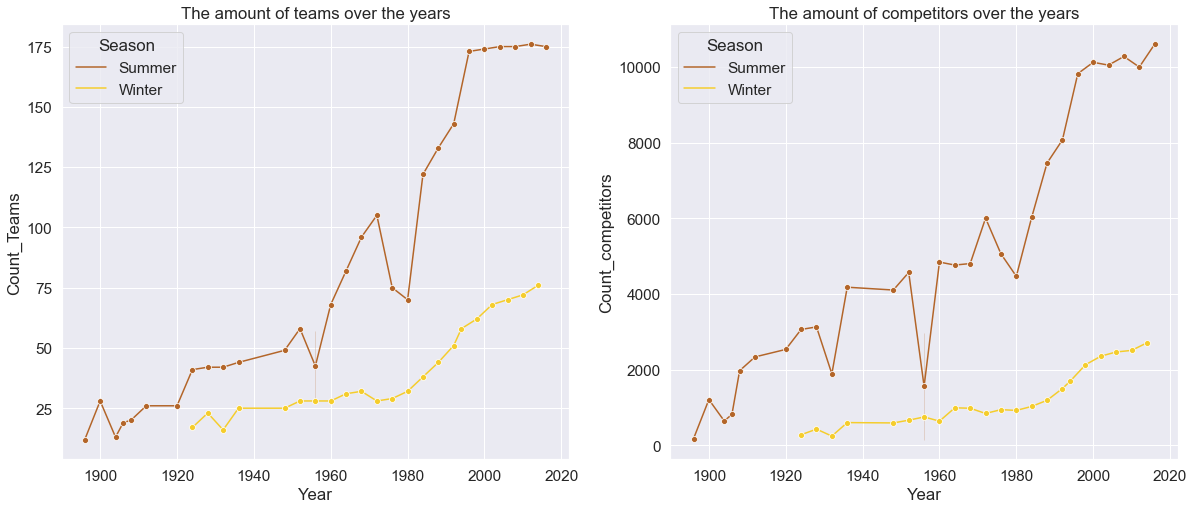

In [86]:
fig,ax=plt.subplots(1,2)
sns_1=sns.lineplot(x='Year',y='Count_Teams',data=Teams_competitors,hue='Season',ax=ax[0],marker='o',color='blue')
sns_2=sns.lineplot(x='Year',y='Count_competitors',data=Teams_competitors,hue='Season',ax=ax[1],marker='o')
sns_1.set_title('The amount of teams over the years')
sns_2.set_title('The amount of competitors over the years')
plt.show()

## More things can be learned

## The Olympics with the lowest number of teams

In [87]:
Teams_competitors[Teams_competitors.Count_Teams==Teams_competitors.Count_Teams.min()]

Year  Season Host_Country  Count_Teams  Count_Men  Count_Female  \
0  1896  Summer       Greece           12        176             0   

   Count_competitors  
0                176

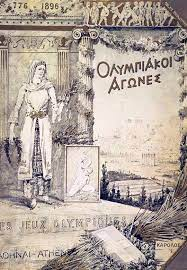

## Olympics with the highest number of teams

In [88]:
Teams_competitors[Teams_competitors.Count_Teams==Teams_competitors.Count_Teams.max()]

Year  Season    Host_Country  Count_Teams  Count_Men  Count_Female  \
49  2012  Summer  United Kingdom          176       5560          4443   

    Count_competitors  
49              10001

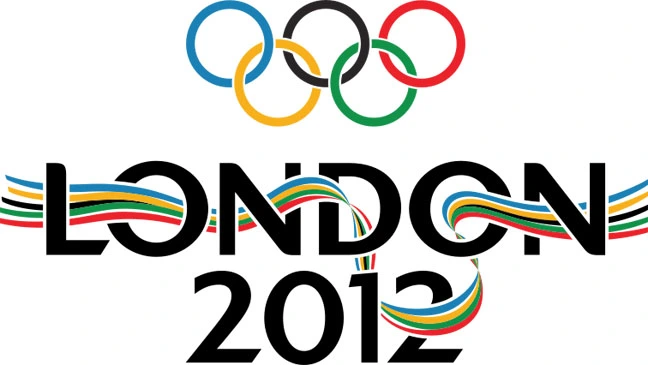

## The Olympics with the lowest number of participants

In [89]:
Teams_competitors[Teams_competitors.Count_competitors==Teams_competitors.Count_competitors.min()]

Year  Season Host_Country  Count_Teams  Count_Men  Count_Female  \
20  1956  Summer       Sweden           28       2759           367   

    Count_competitors  
20                155

<div> 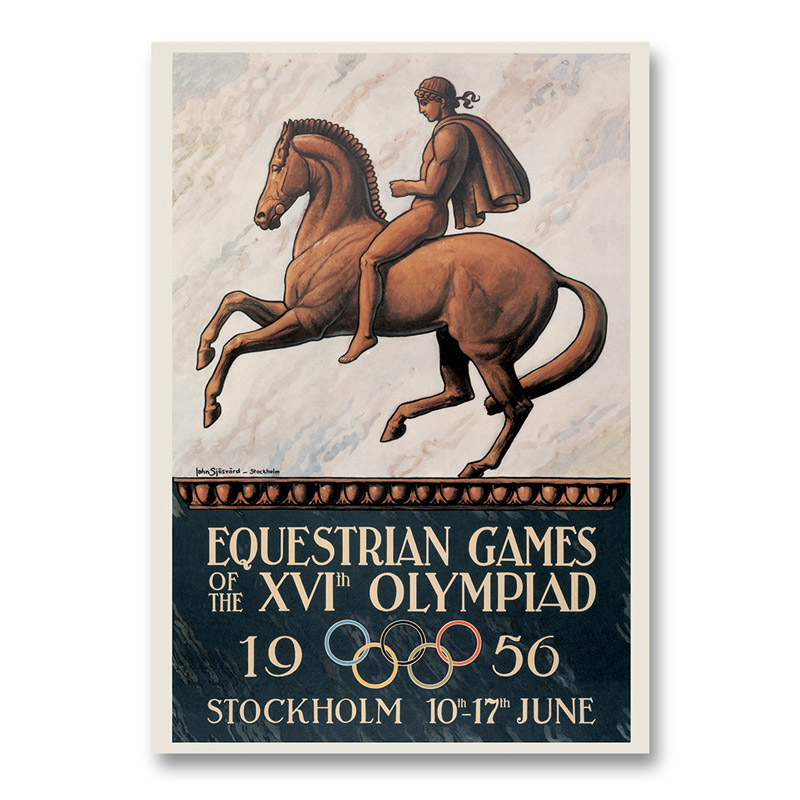</div> 

## The Olympics with the highest number of participants

In [90]:
Teams_competitors[Teams_competitors.Count_competitors==Teams_competitors.Count_competitors.max()]

Year  Season Host_Country  Count_Teams  Count_Men  Count_Female  \
51  2016  Summer       Brazil          175       5788          4817   

    Count_competitors  
51              10606

<div> 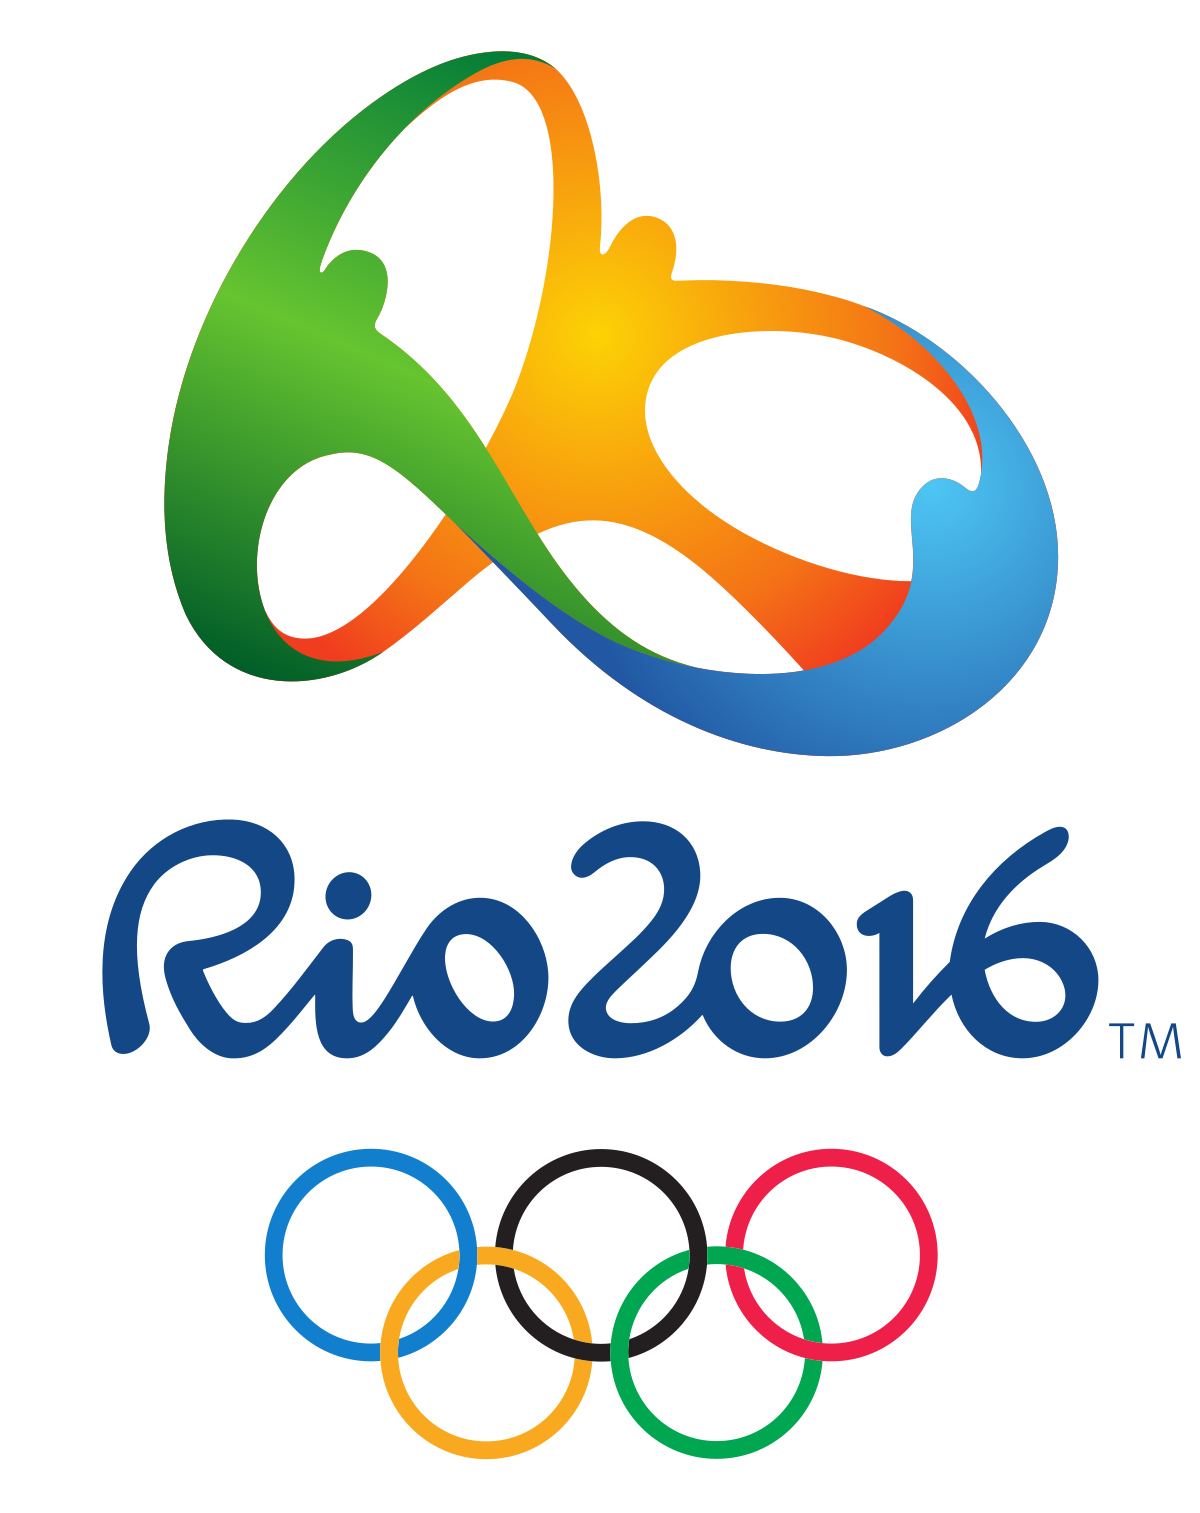</div> 

## Sports and what we can learn from them

In [91]:
#We will first make name corrections
complete["Sport"].replace({"Rhythmic Gymnastics":"Gymnastics","Trampolining":"Gymnastics","Diving":"Swimming","Synchronized Swimming":"Swimming","Water Polo":"Swimming","Beach Volleyball":"Volleyball","Equestrianism":"Equestrian","Canoeing":"Canoe"},inplace=True)

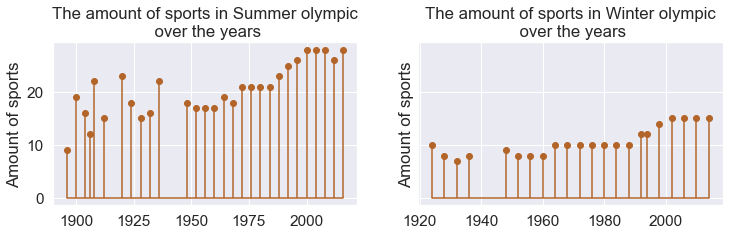

In [92]:
summer_sports_over_y=complete[['Year','Season','Sport']][complete.Season=='Summer']
summer_sports_over_y=summer_sports_over_y[['Year','Sport']].drop_duplicates().groupby('Year').agg('count').reset_index()

winter_sports_over_y=complete[['Year','Season','Sport']][complete.Season=='Winter']
winter_sports_over_y=winter_sports_over_y[['Year','Sport']].drop_duplicates().groupby('Year').agg('count').reset_index()

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3), sharey = True)
fig.subplots_adjust(hspace = 0.3)

ax1.stem(summer_sports_over_y.Year,summer_sports_over_y.Sport)
ax1.set_title('The amount of sports in Summer olympic\n over the years')
ax1.set_ylabel('Amount of sports')

ax2.stem(winter_sports_over_y.Year,winter_sports_over_y.Sport)
ax2.set_title('The amount of sports in Winter olympic\n over the years')
ax2.set_ylabel('Amount of sports')
plt.show()

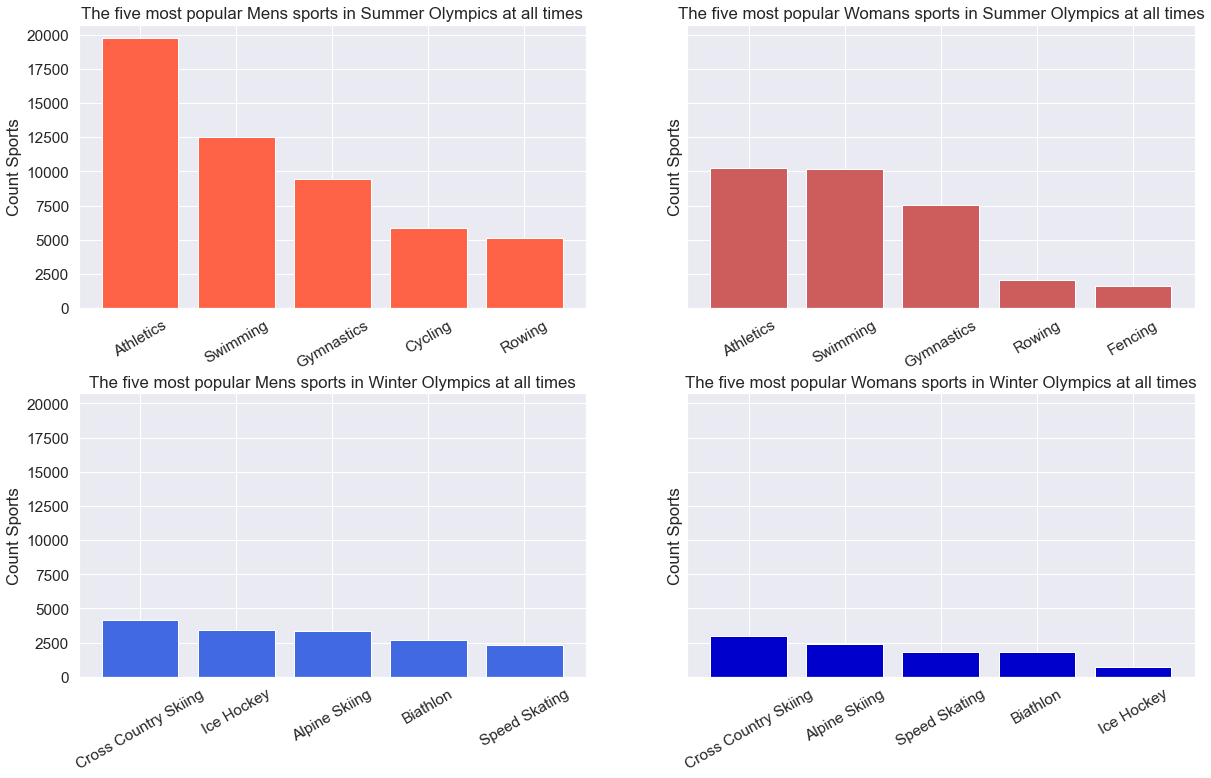

In [93]:
sm_pop_sport=complete[complete.where(complete.Sex=='M').notnull() & complete.where(complete.Season=='Summer').notnull()].dropna().drop_duplicates()
sm_pop_sport=sm_pop_sport[['Sport','Season','Sex','Name']].groupby('Sport')['Name'].agg('count').reset_index().sort_values(by='Name',ascending=False)
sm_pop_sport=sm_pop_sport.rename(columns={'Name':'Count_sport'})
sm_pop_sport1=sm_pop_sport.head()

sf_pop_sport=complete[complete.where(complete.Sex=='F').notnull() & complete.where(complete.Season=='Summer').notnull()].dropna().drop_duplicates()
sf_pop_sport=sf_pop_sport[['Sport','Season','Sex','Name']].groupby('Sport')['Name'].agg('count').reset_index().sort_values(by='Name',ascending=False)
sf_pop_sport=sf_pop_sport.rename(columns={'Name':'Count_sport'})
sf_pop_sport1=sf_pop_sport.head()

wm_pop_sport=complete[complete.where(complete.Sex=='M').notnull() & complete.where(complete.Season=='Winter').notnull()].dropna().drop_duplicates()
wm_pop_sport=wm_pop_sport[['Sport','Season','Sex','Name']].groupby('Sport')['Name'].agg('count').reset_index().sort_values(by='Name',ascending=False)
wm_pop_sport=wm_pop_sport.rename(columns={'Name':'Count_sport'})
wm_pop_sport1=wm_pop_sport.head()

wf_pop_sport=complete[complete.where(complete.Sex=='F').notnull() & complete.where(complete.Season=='Winter').notnull()].dropna().drop_duplicates()
wf_pop_sport=wf_pop_sport[['Sport','Season','Sex','Name']].groupby('Sport')['Name'].agg('count').reset_index().sort_values(by='Name',ascending=False)
wf_pop_sport=wf_pop_sport.rename(columns={'Name':'Count_sport'})
wf_pop_sport1=wf_pop_sport.head()
#-----------------------------#
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12), sharey = True)
fig.subplots_adjust(hspace = 0.3)

ax1.bar(sm_pop_sport1.Sport,sm_pop_sport1.Count_sport,color='tomato')
ax1.set_title('The five most popular Mens sports in Summer Olympics at all times')
ax1.set_ylabel('Count Sports')

ax2.bar(sf_pop_sport1.Sport,sf_pop_sport1.Count_sport,color='indianred')
ax2.set_title('The five most popular Womans sports in Summer Olympics at all times')
ax2.set_ylabel('Count Sports')

ax3.bar(wm_pop_sport1.Sport,wm_pop_sport1.Count_sport,color='royalblue')
ax3.set_title('The five most popular Mens sports in Winter Olympics at all times')
ax3.set_ylabel('Count Sports')

ax4.bar(wf_pop_sport1.Sport,wf_pop_sport1.Count_sport,color='mediumblue')
ax4.set_title('The five most popular Womans sports in Winter Olympics at all times')
ax4.set_ylabel('Count Sports')

plt.setp(ax1.get_xticklabels(), rotation = 30)
plt.setp(ax2.get_xticklabels(), rotation = 30)
plt.setp(ax3.get_xticklabels(), rotation = 30)
plt.setp(ax4.get_xticklabels(), rotation = 30)
plt.show()

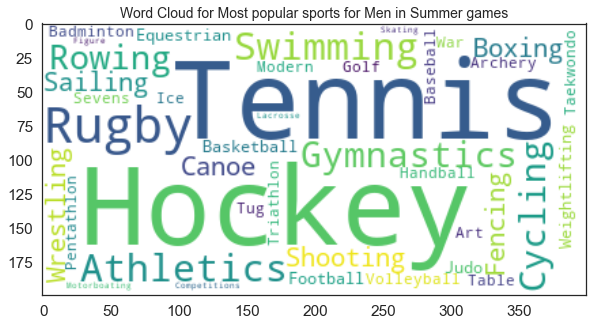

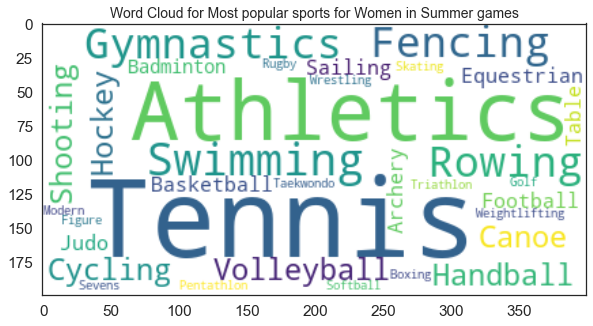

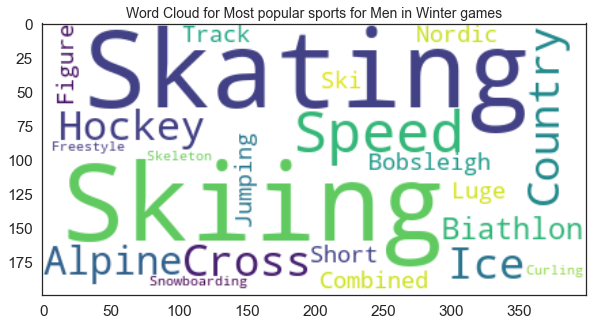

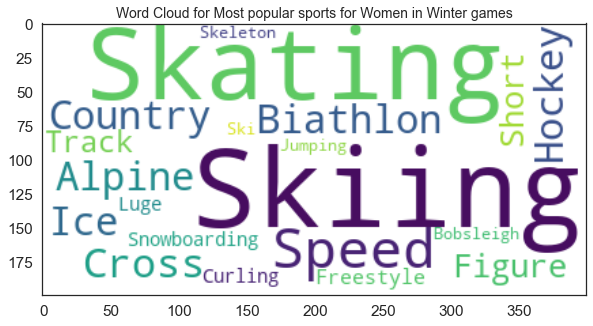

In [94]:
from wordcloud import WordCloud

sns.set(font_scale = 1.4, style = 'white')
arr=[sm_pop_sport,sf_pop_sport,wm_pop_sport,wf_pop_sport]
titles=['Most popular sports for Men in Summer games','Most popular sports for Women in Summer games' ,'Most popular sports for Men in Winter games','Most popular sports for Women in Winter games']

def print_wordcloud(data,title):
    plt.figure(figsize=(15,5))
    wc = WordCloud(background_color='white', max_font_size=80).generate(' '.join(data.Sport))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}', fontsize=14)
    plt.show()
    
for i,j in zip(arr,titles):
    print_wordcloud(i,j)   

## Events

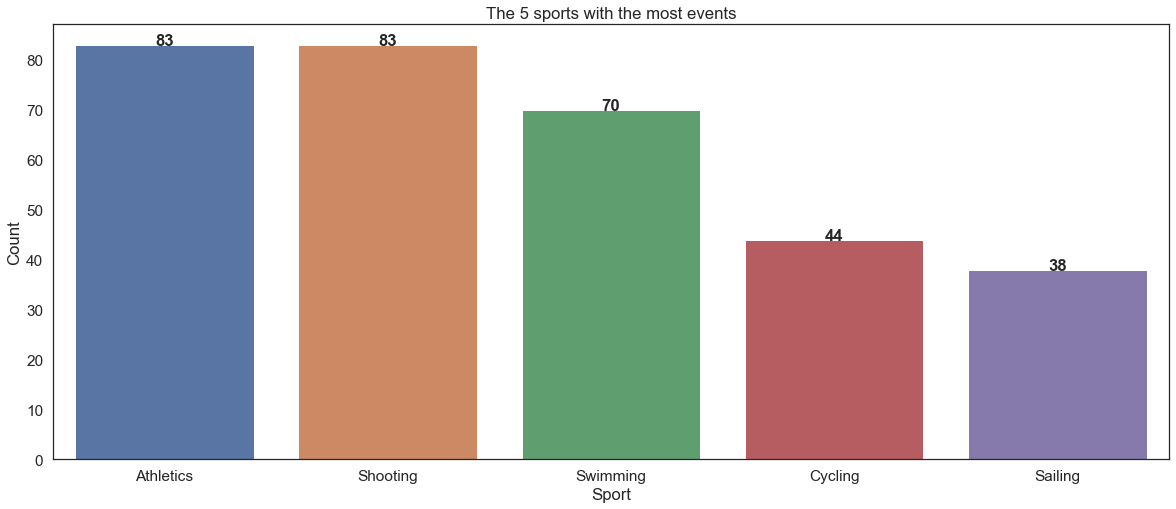

In [95]:
events=complete[['Sport','Event']].drop_duplicates().groupby('Sport').agg('count').reset_index()
events_top=events.sort_values(by='Event',ascending=False).head()
sns.barplot(x=events_top.Sport,y=events_top.Event)
add_value_label([1,2,3,4,5],events_top.Event.to_list())
plt.ylabel("Count")
plt.title("The 5 sports with the most events")
plt.show()

In [96]:
sport_event=complete[['Sport','Event','Name']].drop_duplicates().groupby(['Sport','Event']).agg('count')
sport_event=sport_event[sport_event.index.get_level_values('Sport').isin(events_top.Sport.to_list())].reset_index()
sport_event['rank']=sport_event.groupby('Sport')['Name'].rank(method='dense',ascending=False).astype(int)
sport_event.rename(columns={'Name':'Count_Com'},inplace=True)
sport_event[sport_event['rank']<4]

Sport                                              Event  Count_Com  \
6    Athletics                         Athletics Men's 100 metres       1475   
20   Athletics               Athletics Men's 4 x 100 metres Relay       1449   
45   Athletics                           Athletics Men's Marathon       1561   
90     Cycling       Cycling Men's 100 kilometres Team Time Trial        828   
108    Cycling                Cycling Men's Road Race, Individual       2233   
113    Cycling           Cycling Men's Team Pursuit, 4,000 metres       1076   
152    Sailing                    Sailing Mixed One Person Dinghy        402   
155    Sailing                Sailing Mixed Three Person Keelboat        685   
158    Sailing                  Sailing Mixed Two Person Keelboat        453   
174   Shooting              Shooting Men's Free Pistol, 50 metres        527   
224   Shooting  Shooting Men's Small-Bore Rifle, Prone, 50 metres        619   
228   Shooting                                Shooting Men's Trap        426   
266   Swimming                Swimming Men's 100 metres Freestyle        941   
279   Swimming      Swimming Men's 4 x 200 metres Freestyle Relay       1146   
316   Swimming                        Water Polo Men's Water Polo       2057   

     rank  
6       2  
20      3  
45      1  
90      3  
108     1  
113     2  
152     3  
155     1  
158     2  
174     2  
224     1  
228     3  
266     3  
279     2  
316     1

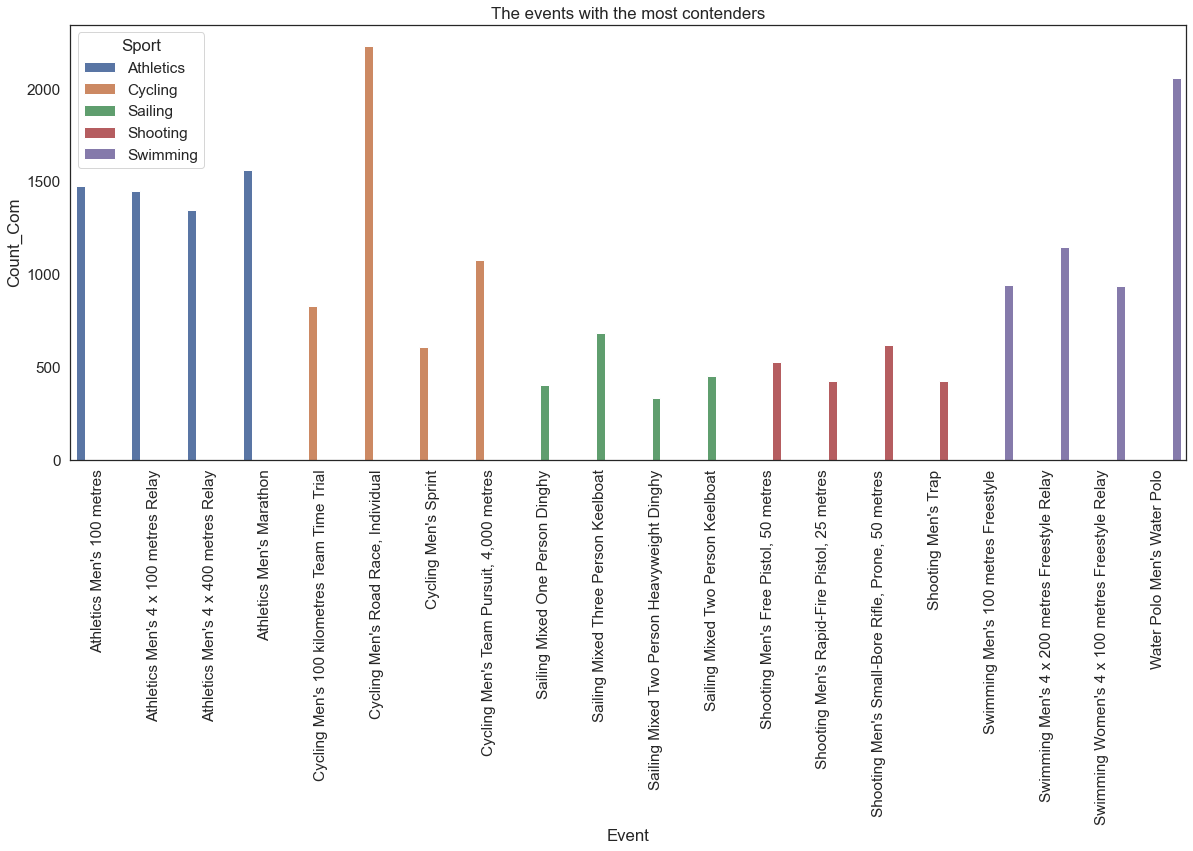

In [97]:
sns_1=sns.barplot(x='Event',y='Count_Com',hue='Sport',data=sport_event[sport_event['rank']<5],ci=None)
plt.title("The events with the most contenders")
plt.setp(sns_1.get_xticklabels(), rotation =90)
plt.show()

## Sports and Events

We will represent the sports with the most industries the three sports that had the most contenders

In [98]:
data = [{'id': 'Sport', 
         'datum': 15878,
         'children' : [
              {'id' : events_top.Sport.to_list()[0], 'datum':sum(sport_event.Count_Com[sport_event['Sport']=='Athletics'][sport_event['rank']<6]),
                   'children' : [
                     {'id' : sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==1].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==1].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==2].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==2].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==3].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==3].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==4].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==4].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==5].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Athletics'][sport_event['rank']==5].values[0,2] } 
                   ]}, 
              {'id' : events_top.Sport.to_list()[1], 'datum' : sum(sport_event.Count_Com[sport_event['Sport']=='Shooting'][sport_event['rank']<6]), 
                   'children' : [
                     {'id' : sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==1].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==1].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==2].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==2].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==3].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==3].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==4].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==4].values[0,2] },
                     {'id' : sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==5].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Shooting'][sport_event['rank']==5].values[0,2] }
                       
                   ]},
              {'id' : events_top.Sport.to_list()[2], 'datum' : sum(sport_event.Count_Com[sport_event['Sport']=='Swimming'][sport_event['rank']<6]),  
                   'children' : [
                     {'id' : sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==1].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==1].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==2].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==2].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==3].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==3].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==4].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==4].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==5].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Swimming'][sport_event['rank']==5].values[0,2]}
                   ]},
              {'id' : events_top.Sport.to_list()[3], 'datum' :sum(sport_event.Count_Com[sport_event['Sport']=='Cycling'][sport_event['rank']<6]) ,  
                   'children' : [
                     {'id' : sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==1].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==1].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==2].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==2].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==3].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==3].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==4].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==4].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==5].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Cycling'][sport_event['rank']==5].values[0,2]}
                   ]},
              {'id' : events_top.Sport.to_list()[4], 'datum' : sum(sport_event.Count_Com[sport_event['Sport']=='Sailing'][sport_event['rank']<6]),  
                   'children' : [
                     {'id' : sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==1].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==1].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==2].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==2].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==3].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==3].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==4].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==4].values[0,2]},
                     {'id' : sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==5].values[0,1], 'datum' :sport_event[sport_event['Sport']=='Sailing'][sport_event['rank']==5].values[0,2]}
                   ]}
    ]}]

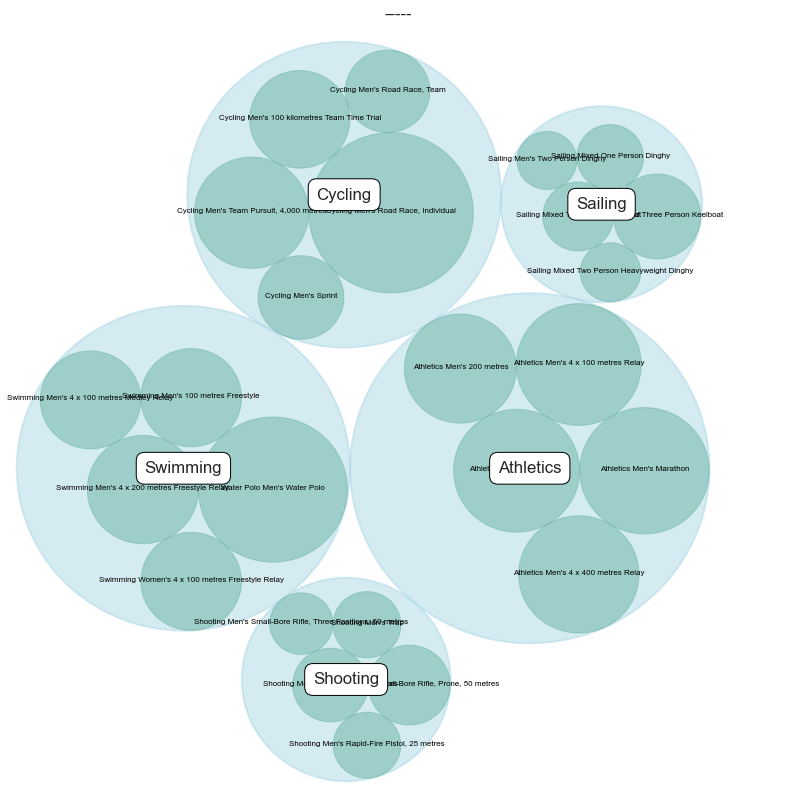

In [99]:
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(data, show_enclosure=False,  target_enclosure=circlify.Circle(x=0, y=0, r=1))

fig, ax = plt.subplots(figsize=(14,14))
ax.set_title('-----')
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r,)for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=1, color="#69b3a2"))
    plt.annotate(label, (x,y), ha='center', color="black",size=8)

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

In [100]:
sport_count=complete[['Year','Season','Sport']]
sport_count["Sport"].replace({"Rhythmic Gymnastics":"Gymnastics","Diving":"Swimming","Beach Volleyball":"Volleyball","Equestrianism":"Equestrian","Canoeing":"Canoe"},inplace=True)
sport_count=sport_count.drop_duplicates().groupby(['Year','Season']).agg('count').reset_index()

event_count=complete[['Year','Season','Event']]
event_count=event_count.drop_duplicates().groupby(['Year','Season']).agg('count').reset_index()
sport_teams_competitors=sport_count.merge(Teams_competitors,how='inner',on=['Year','Season'])
sport_teams_competitors.rename(columns={'Sport':'Count_sport'},inplace=True)
event_sport_teams_competitors=event_count.merge(sport_teams_competitors,how='inner',on=['Year','Season'])
event_sport_teams_competitors.rename(columns={'Event':'Count_event'},inplace=True)
event_sport_teams_competitors['amount_of_medals_awarded']=event_sport_teams_competitors.apply(lambda row:row.Count_event*3,axis=1)

right_order=["Year","Season","Host_Country","Count_Teams","Count_Men","Count_Female","Count_competitors","Count_sport","Count_event","amount_of_medals_awarded"]
event_sport_teams_competitors=event_sport_teams_competitors.reindex(columns=right_order)
event_sport_teams_competitors.head()

Year  Season    Host_Country  Count_Teams  Count_Men  Count_Female  \
0  1896  Summer          Greece           12        176             0   
1  1900  Summer          France           28       1189            22   
2  1904  Summer   United States           13        640             6   
3  1906  Summer          Greece           19        814             6   
4  1908  Summer  United Kingdom           20       1931            44   

   Count_competitors  Count_sport  Count_event  amount_of_medals_awarded  
0                176            9           43                       129  
1               1211           19           90                       270  
2                646           16           95                       285  
3                820           12           74                       222  
4               1975           22          109                       327

## Final table for model construction

In [101]:
#sub_complete=complete[complete.Season=='Summer'][complete.Year>1980]
count_com=complete[['Games','Host_Country','Country','Name']].drop_duplicates().groupby(['Games','Country','Host_Country']).agg('count').reset_index()
count_spo=complete[['Games','Country','Sport']].drop_duplicates().groupby(['Games','Country']).agg('count').reset_index()
count_med=complete[['Games','Country','Medal_Won']].groupby(['Games','Country']).agg('sum').reset_index()
avg_age_com=round(complete[['Games','Country','Age']].dropna().groupby(['Games','Country']).agg('mean').reset_index())

height_avg_com=round(complete[['Games','Country','Height']].dropna().groupby(['Games','Country']).agg('mean').reset_index())
height_avg_com['Height']=height_avg_com['Height']/100
weight_avg_com=round(complete[['Games','Country','Weight']].dropna().groupby(['Games','Country']).agg('mean').reset_index())

bmi_for_each_team=height_avg_com.merge(weight_avg_com,how='inner',on=['Games','Country'])
bmi_for_each_team['AVG_BMI_participants']=round(bmi_for_each_team['Weight']/pow(bmi_for_each_team['Height'],2))

Team_per_games=(((count_com.merge(count_spo,how='inner',on=['Games','Country'])).merge(count_med,how='inner',on=['Games','Country'])).merge(avg_age_com,how='inner',on=['Games','Country'])).merge(bmi_for_each_team[["Games","Country","AVG_BMI_participants"]],how='inner',on=['Games','Country'])
Team_per_games.rename(columns={'Name':'amount_participants_team','Sport':'amount_sports_team','Medal_Won':'Total_medals_team','Age':'AVG_age_participants'},inplace='True')
Team_per_games["Host_Country_Advance"]=np.where(Team_per_games.Country==Team_per_games.Host_Country,1,0)
Team_per_games=Team_per_games.merge(complete[['Country','Population','GDP']].drop_duplicates(),how='inner',on=['Country'])
complete_team_per_games=Team_per_games[['Games','Country','Host_Country','amount_participants_team','AVG_age_participants','AVG_BMI_participants','amount_sports_team','Host_Country_Advance','Population','GDP','Total_medals_team']]

In [102]:
complete_team_per_games.drop(columns={'Host_Country'},inplace=True)
complete_team_per_games.sort_values(by='Total_medals_team',ascending=False)

Games                   Country  amount_participants_team  \
767   1980 Summer                    Russia                       489   
138   1904 Summer             United States                       524   
90    1908 Summer            United Kingdom                       735   
168   1984 Summer             United States                       522   
181   2008 Summer             United States                       588   
...           ...                       ...                       ...   
1947  1964 Summer                 Sri Lanka                         6   
1946  1960 Summer                 Sri Lanka                         5   
1015  1994 Winter                     Spain                        13   
1944  2014 Winter                   Morocco                         2   
3036  2016 Summer  East Timor (Timor-Leste)                         3   

      AVG_age_participants  AVG_BMI_participants  amount_sports_team  \
767                   24.0                  23.0                  21   
138                   27.0                  23.0                  16   
90                    30.0                  25.0                  22   
168                   25.0                  23.0                  21   
181                   26.0                  23.0                  27   
...                    ...                   ...                 ...   
1947                  26.0                  20.0                   4   
1946                  22.0                  20.0                   4   
1015                  23.0                  22.0                   4   
1944                  18.0                  24.0                   1   
3036                  26.0                  23.0                   2   

      Host_Country_Advance   Population           GDP  Total_medals_team  
767                      1  144096812.0   9092.580536                442  
138                      1  321418820.0  56115.718426                394  
90                       1   65138232.0  43875.969614                368  
168                      1  321418820.0  56115.718426                352  
181                      0  321418820.0  56115.718426                317  
...                    ...          ...           ...                ...  
1947                     0   20966000.0   3926.174396                  0  
1946                     0   20966000.0   3926.174396                  0  
1015                     0   46418269.0  25831.582305                  0  
1944                     0   34377511.0   2878.201342                  0  
3036                     0    1245015.0   1157.992956                  0  

[3037 rows x 10 columns]

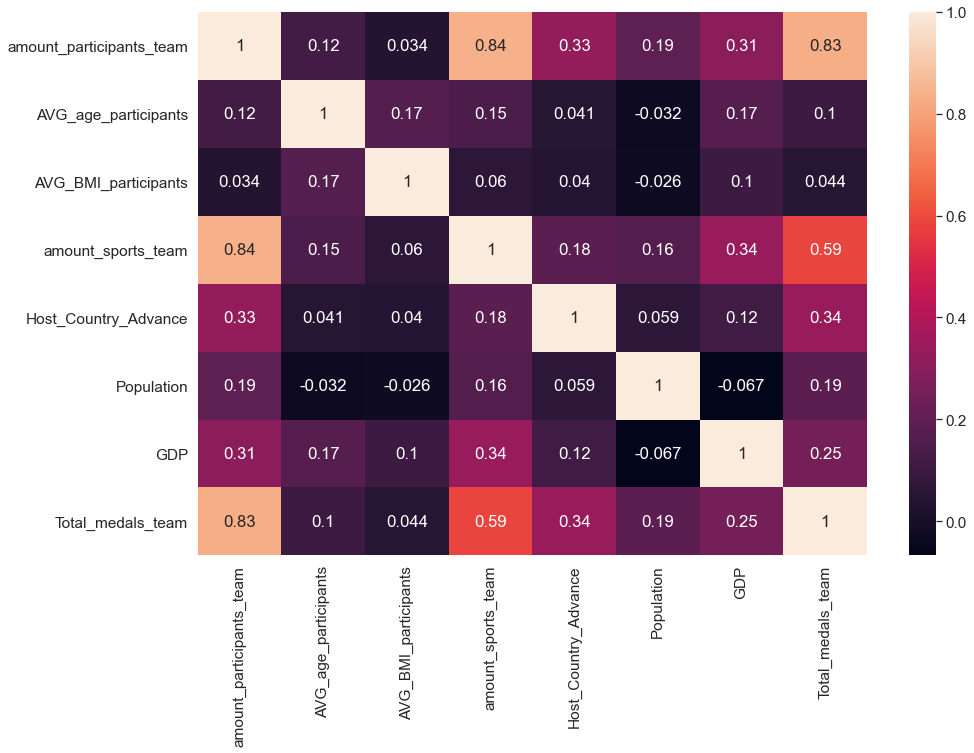

In [103]:
corr = complete_team_per_games.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(complete_team_per_games.corr(), annot=True)
plt.show()

Lets draw few plot that shows the correlation between Independent variables in final table complete_team_per_games.  

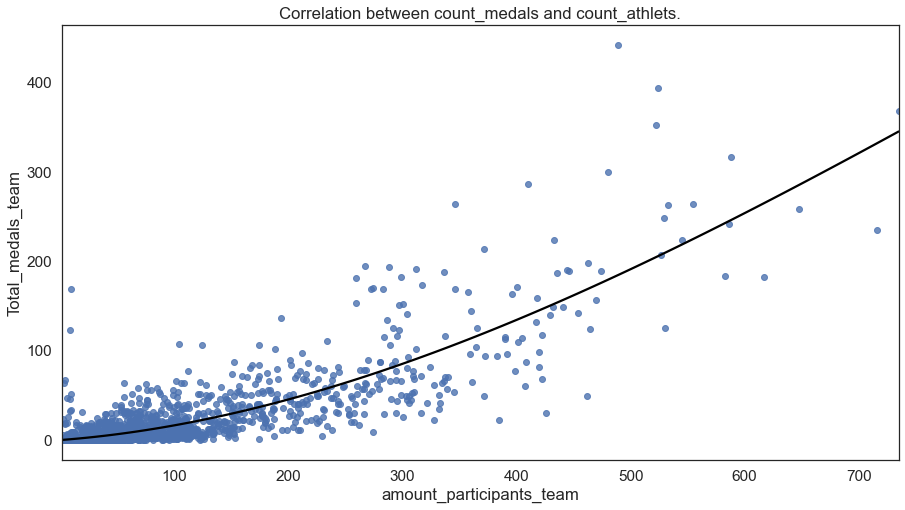

In [104]:
plt.figure(figsize=(15,8))

plt.title('Correlation between count_medals and count_athlets.')
df_temp = complete_team_per_games

ax = sns.regplot(x="amount_participants_team", y="Total_medals_team", data=complete_team_per_games, line_kws={"color": "black"},order=3, ci=None)

It can be clearly seen that when the team is bigger then the amount of medals increases.
So team size is an influencing factor!

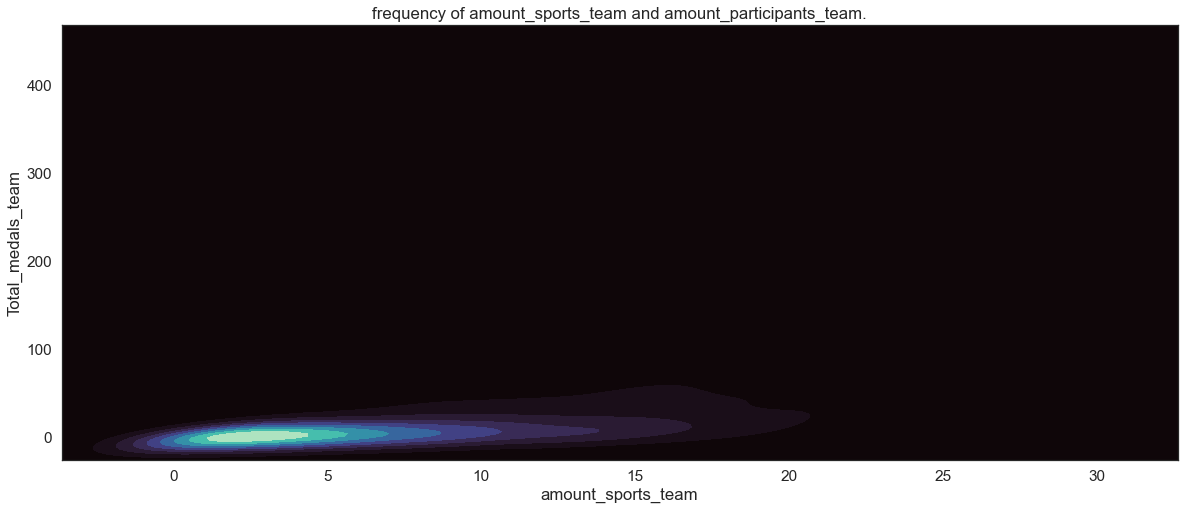

In [105]:
sns.kdeplot(data=complete_team_per_games,x='amount_sports_team',y='Total_medals_team',fill=True, thresh=0, cmap="mako")
plt.title('frequency of amount_sports_team and amount_participants_team.')
plt.show()

We can learn few of things from this plot, but first we have to understand what the plot means:

Brighter colour stands for more common accurence. In other words it means that The vast majority of cases it when team participates between 3 and 5 sports then she achived medals.

Probably the logic behind this is that it is better to focus on certain sports and not be scattered in a lot of disciplines because that way the chances of winning a medal go down.

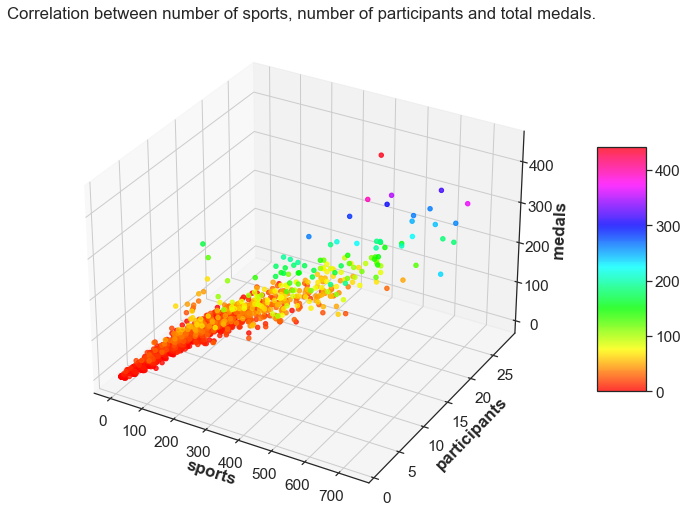

In [106]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (18, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('hsv')
df_temp = complete_team_per_games
x = df_temp["amount_participants_team"]
y = df_temp["amount_sports_team"]
z = df_temp["Total_medals_team"]
sctt = ax.scatter3D(x, y, z, cmap = my_cmap, c = z ,alpha = 0.8 )


ax.set_xlabel('sports', fontweight ='bold')
ax.set_ylabel('participants', fontweight ='bold')
ax.set_zlabel('medals', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between number of sports, number of participants and total medals.')
plt.show()

As we can see there is strong correlation between the 3 varibales.
* 0.83 between amount_participants_team and Total_medals_team 
* 0.59 between amount_sports_team and price Total_medals_team 
* 0.84 between amount_participants_team amount_sports_team.

<Figure size 864x576 with 0 Axes>

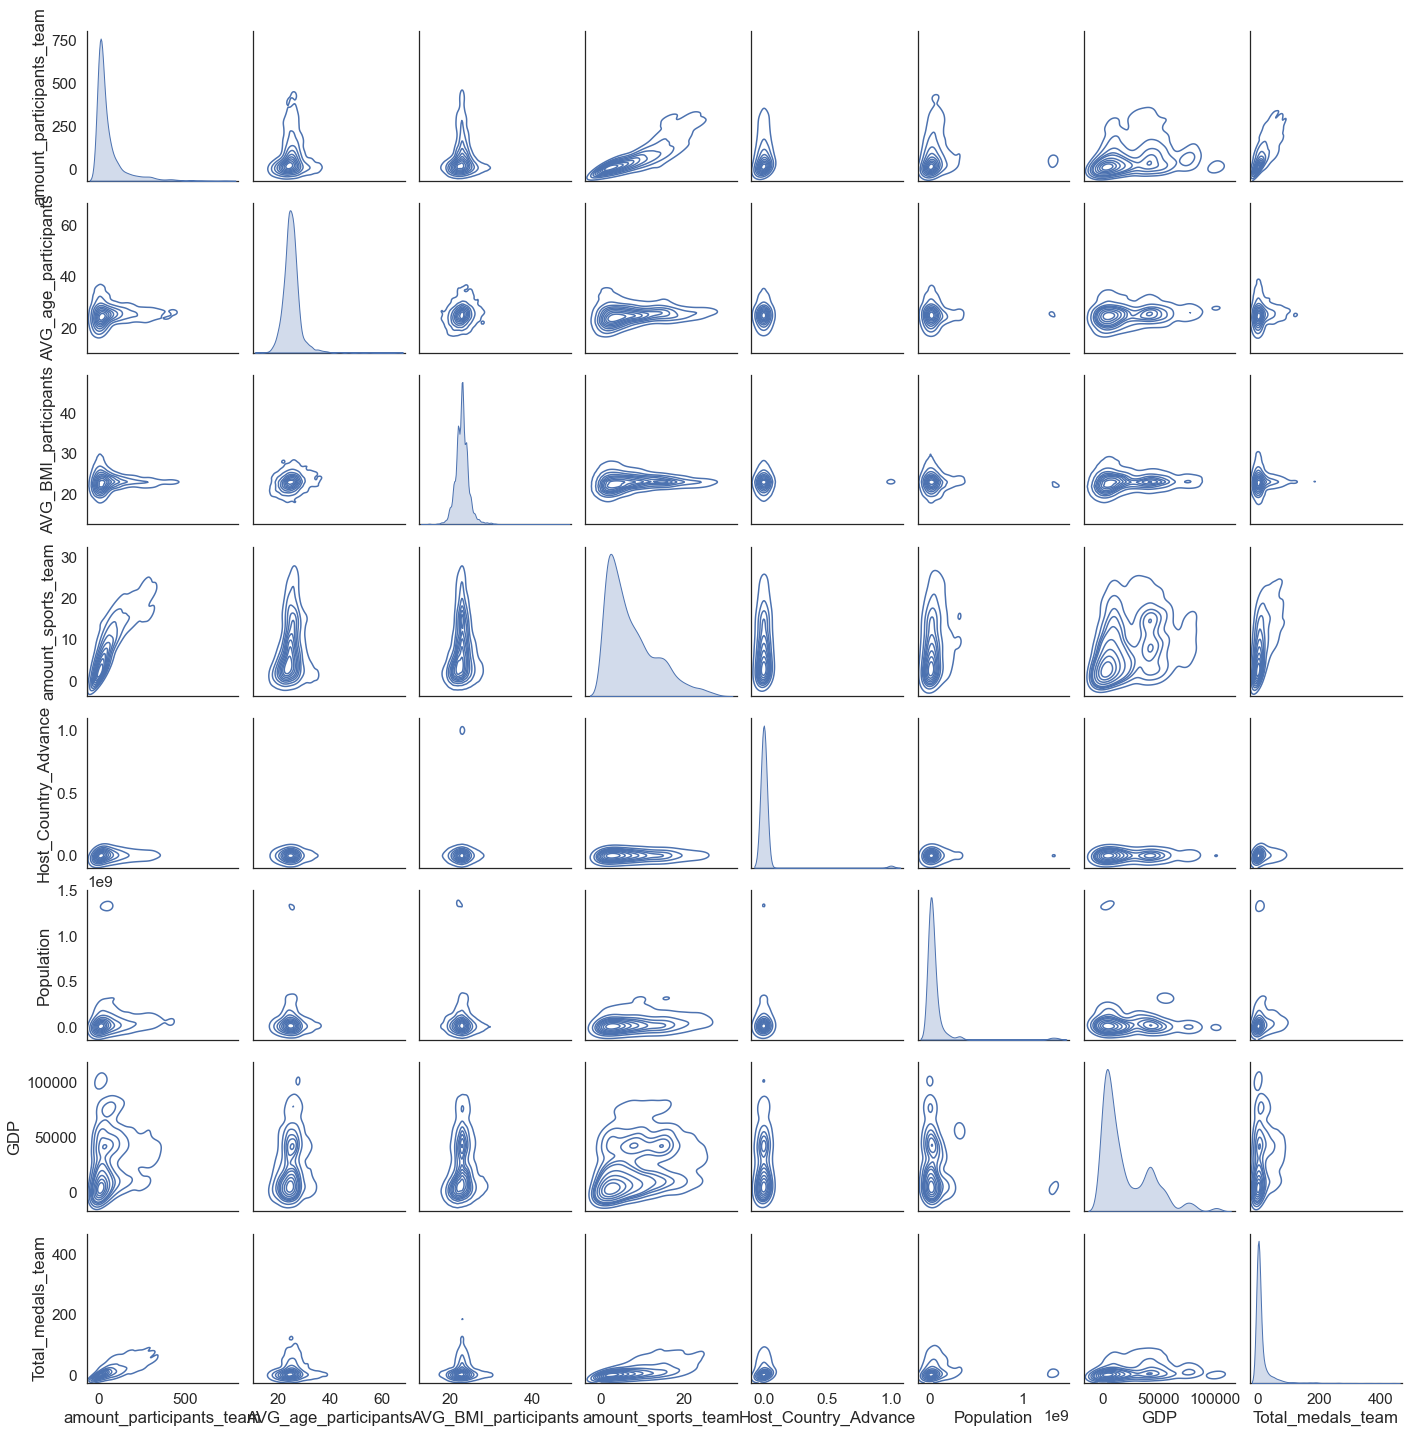

In [107]:
plt.figure(figsize=(12, 8))
sns.pairplot(complete_team_per_games,kind="kde")
plt.show()

We will take seven countries with the most medals
And we will see if they have a home advantage when the games took place in their country.

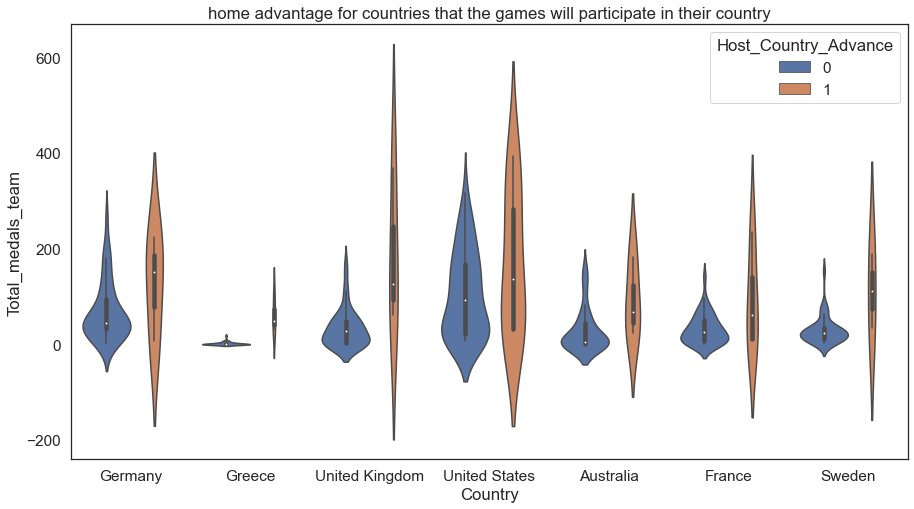

In [108]:
host_adv=arr_host_s.Host_Country[arr_host_s.Games>1].to_list()
boolean_series = complete_team_per_games.Country.isin(host_adv)
filtered_df = complete_team_per_games[boolean_series]
plt.figure(figsize=(15,8))
sns.violinplot(x="Country", y="Total_medals_team",  hue="Host_Country_Advance", data=filtered_df)
plt.title('home advantage for countries that the games will participate in their country')
plt.show()

conclusion:
all countries have home advantage and the amount of medals higher (for some of them significantly) when the games took place in their country.

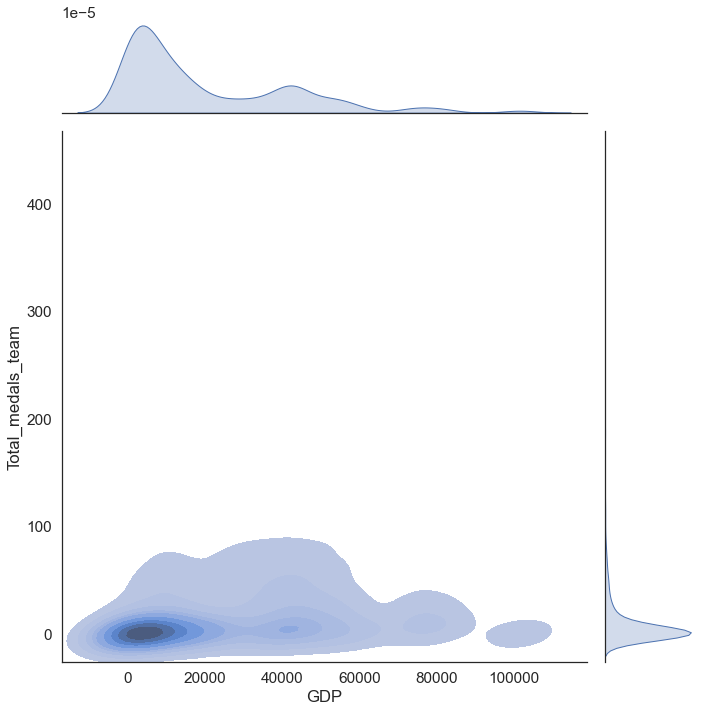

In [109]:
sns.jointplot(data=complete_team_per_games, x="GDP",  y="Total_medals_team",height=10,kind='kde',fill=True)
plt.show()

The significate correlation between the GDP and the total medals is 0.29

This means that GDP that richer countries do not necessarily bring more medals.

# PCA

Lets use PCA technique to reduce the dimension of our data set in order to simplfy building the AI model down the road.

first, lets drop non numeric values from the dataset, and lets seperate the features from the target varibales, and normalize the features varibales.

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [111]:
complete_team_per_games_pca = complete_team_per_games.drop(['Games','Country'], axis = 1) 
classes = complete_team_per_games_pca['Total_medals_team'].reset_index(drop=True)

features = complete_team_per_games_pca.drop(['Total_medals_team'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

In [112]:
features_norm.shape

(3037, 7)

In [113]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf["Total_medals_team"] = classes

pca.explained_variance_ratio_ 

array([0.32266548, 0.17514646])

In [114]:
print("The numbers array {} means that almost {}% of the variance in Total_medals_team can be explained by the first principal component and {}% of the variance in price can be explained by the second principal component.".format(pca.explained_variance_ratio_,round(pca.explained_variance_ratio_ [0],2),round(pca.explained_variance_ratio_ [1],2)))

The numbers array [0.32266548 0.17514646] means that almost 0.32% of the variance in Total_medals_team can be explained by the first principal component and 0.18% of the variance in price can be explained by the second principal component.


In [115]:
principalDf['medals_bins']=pd.cut(x=principalDf['Total_medals_team'],bins=[-1,0,10,50,100,200,300,400,500],labels=['NO_Medals','1-9 Medals','10-49 Medals','50-99 Medals','100-199 Medals','200-299 Medals','300-399 Medals','400-499 Medals'])
principalDf

PC 1      PC 2  Total_medals_team   medals_bins
0    -0.062762  0.479985                 32  10-49 Medals
1     0.687200  0.597771                 45  10-49 Medals
2     0.158604  0.436021                 16  10-49 Medals
3     0.408884  0.425892                 30  10-49 Medals
4     0.817911 -0.154620                 21  10-49 Medals
...        ...       ...                ...           ...
3032 -1.634844 -1.303055                  0     NO_Medals
3033 -1.595374 -0.643107                  0     NO_Medals
3034 -1.588509 -0.645128                  0     NO_Medals
3035 -1.728922 -0.609283                  0     NO_Medals
3036 -1.243889  0.247837                  0     NO_Medals

[3037 rows x 4 columns]

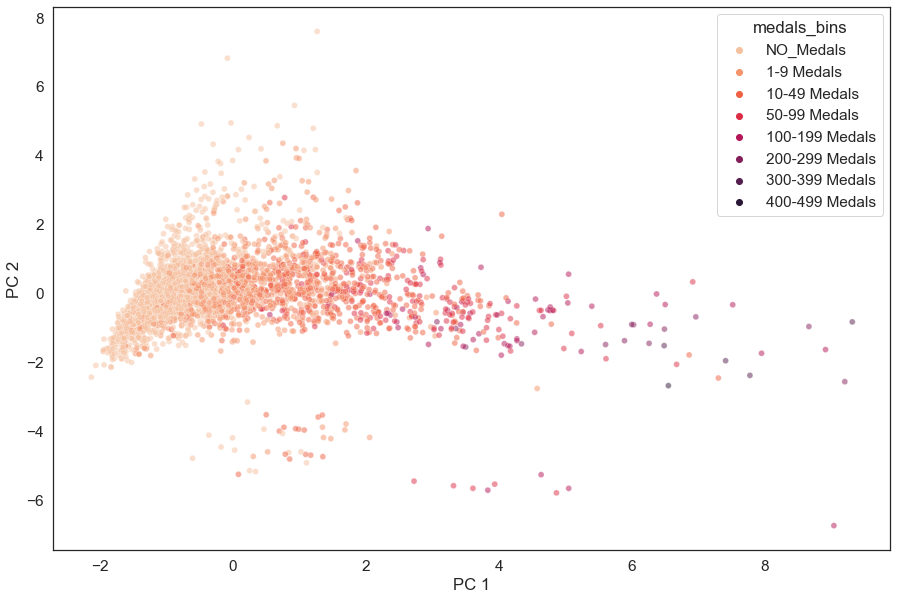

In [116]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf, x="PC 1", y="PC 2", palette="rocket_r" , alpha = 0.5,hue="medals_bins")  
plt.show()

The PCA breakdown into 2 main Components can explain us the variance in medals amount sucssesfully, we see a strog correlation between increase in PC 1 and PC 2 value to an increase in the medals achivment.

# Building model for predicting how many medals can team brings to her state.

After we explored the data we need to solve our inital problem: tring to predict how many medals can team get!

In oreder to achive this we have to build machine learning model, we will try to use varius types of regression models.

We will try to predict amount medals for all participating teams in summer games between 2000 and 2016.

We will focus on these games because the GDP and the amount of population correspond to these years and so we can predict more accurately.

We will split the datasets to inputs and targets, the inputs are all the the independent variables such as (amount participants , mean age of the participants, GDP and etc) and the input is the dependent variable (the amount of medals for each team).

In [117]:
inputs = complete_team_per_games.drop(['Total_medals_team'],axis = 'columns')
target = complete_team_per_games['Total_medals_team']

For the purpose of training a regression model on the data set we will convert all the non numeric values to numerical values.

In [118]:
from sklearn import preprocessing
Games_encoder = preprocessing.LabelEncoder()
Games_encoder.fit(complete_team_per_games['Games'].value_counts().index.tolist())

Country_encoder = preprocessing.LabelEncoder()
Country_encoder.fit(complete_team_per_games['Country'].value_counts().index.tolist())

inputs['Games_n'] = Games_encoder.transform(inputs['Games'])
inputs['Country_n'] = Country_encoder.transform(inputs['Country'])

inputs = inputs.drop(['Games','Country'],axis = 'columns')
inputs.head()

amount_participants_team  AVG_age_participants  AVG_BMI_participants  \
0                        19                  24.0                  24.0   
1                        76                  24.0                  25.0   
2                        22                  24.0                  24.0   
3                        49                  26.0                  23.0   
4                        82                  25.0                  22.0   

   amount_sports_team  Host_Country_Advance  Population           GDP  \
0                   6                     0  81413145.0  41313.313995   
1                   9                     0  81413145.0  41313.313995   
2                   8                     0  81413145.0  41313.313995   
3                   8                     0  81413145.0  41313.313995   
4                  11                     0  81413145.0  41313.313995   

   Games_n  Country_n  
0        0         62  
1        1         62  
2        2         62  
3        3         62  
4        4         62

Let's look at our dataset now, the whole data set contains only numeric values. So we can start training the model.

# Training and Testing


First, we will split the inputs and the target into two additional parts The first part of each data set is called the training set and with it we will be training to the model The second part of each data set is called the test set and with it we will test the model and its level of accuracy in predicting target variables of observations which have not been seen before.

In [119]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target)

## Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)
print("Linear Regression score: %.2f" % LR.score(x_test,y_test))
print("")
print("* The variance in the target variable can be explained in {}% by this indepndent variables in the specific model ".format(round(LR.score(x_test,y_test),2)*100))

Linear Regression score: 0.71

* The variance in the target variable can be explained in 71.0% by this indepndent variables in the specific model 


## SVR Regression

In [121]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_model = sv_reg.fit(x_train,y_train)
print("SVR Regression score: %.2f" % sv_model.score(x_test,y_test))
print("")
print("* not great result ({}) for the SVR regression model, lets try another algorithm".format(round(sv_model.score(x_test,y_test),2)))

SVR Regression score: -0.02

* not great result (-0.02) for the SVR regression model, lets try another algorithm


## Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(x_train,y_train)
print("Random Forest score: %.2f" % rf_model.score(x_test,y_test))
print("")
print("* {} the best reslut so far".format(round(rf_model.score(x_test,y_test),2)))

Random Forest score: 0.84

* 0.84 the best reslut so far


## Decision Trees

In [123]:
from sklearn.tree import DecisionTreeRegressor

dt_one_reg = DecisionTreeRegressor()
dt_model = dt_one_reg.fit(x_train,y_train)
print("Decision Trees score: %.2f" % dt_model.score(x_test,y_test))

Decision Trees score: 0.68


# Gradient Boosting

In [124]:
import xgboost

gb_reg = xgboost.XGBRegressor().fit(x_train, y_train)
print("Gradient Boosting score: %.2f" % gb_reg.score(x_test,y_test),"r squared is considered quite precies")
print("")
print("* We achived a good result with the gridaent boosting algotithm, {}% of the variance can be explained by the Gridaent boosting model.".format(round(gb_reg.score(x_test,y_test),2)*100))

Gradient Boosting score: 0.80 r squared is considered quite precies

* We achived a good result with the gridaent boosting algotithm, 80.0% of the variance can be explained by the Gridaent boosting model.


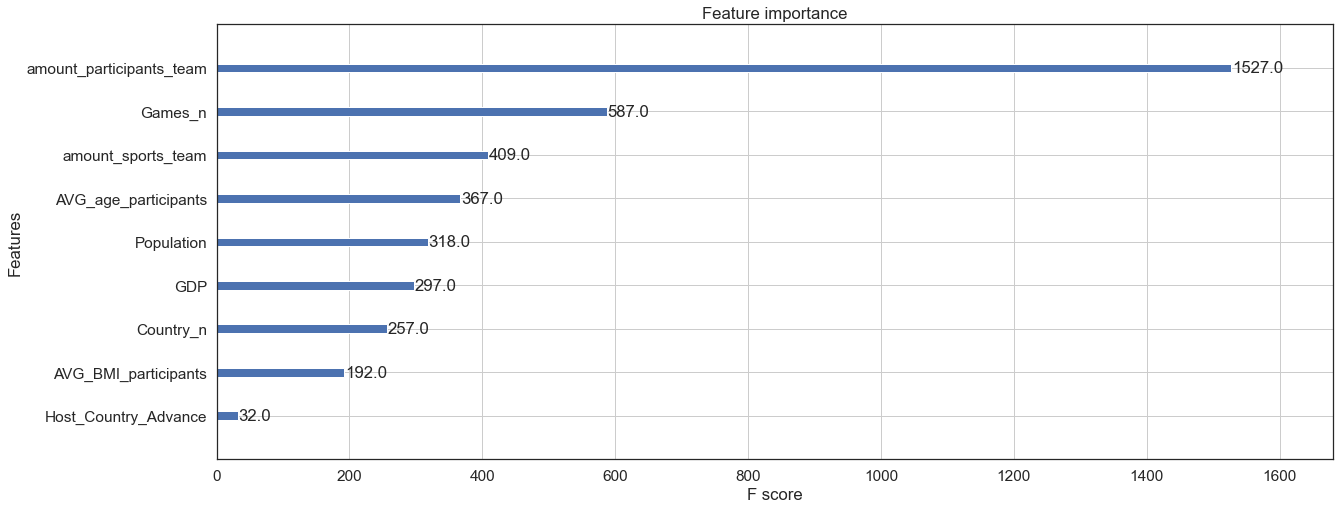

In [125]:
from xgboost import plot_importance
plot_importance(gb_reg)
plt.show()

## Comparing the Models


A further examination is made of the quality of the model, which is also done on each model that is trained, and it will decide which model is the best.

In [126]:
from sklearn.metrics import mean_squared_error
best_model={}

y_pred = LR.predict(x_test)
best_model.update({'linear rmse':round(np.sqrt(mean_squared_error(y_test,y_pred)),2)})
print('linear rmse = %.2f' % np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_sv = sv_reg.predict(x_test)
best_model.update({'svm rmse':round(np.sqrt(mean_squared_error(y_pred_sv,y_test)),2)})
print('svm rmse = %.2f' %  np.sqrt(mean_squared_error(y_pred_sv,y_test)))

y_pred_gb = gb_reg.predict(x_test)
best_model.update({'gb rmse':round(np.sqrt(mean_squared_error(y_pred_gb,y_test)),2)})
print('gb rmse = %.2f' %  np.sqrt(mean_squared_error(y_pred_gb,y_test)))

y_pred_rf = rf_reg.predict(x_test)
best_model.update({'rf rmse':round(np.sqrt(mean_squared_error(y_pred_rf,y_test)),2)})
print('rf rmse = %.2f' %  np.sqrt(mean_squared_error(y_pred_rf,y_test)))

y_pred_dt = dt_one_reg.predict(x_test)
best_model.update({'decision tree regressor rmse':round(np.sqrt(mean_squared_error(y_pred_dt,y_test)),2)})
print('decision tree regressor rmse = %.2f' %  np.sqrt(mean_squared_error(y_pred_dt,y_test)))

linear rmse = 15.52
svm rmse = 29.35
gb rmse = 12.96
rf rmse = 11.63
decision tree regressor rmse = 16.50


In [127]:
lowest_val=min(best_model,key=best_model.get)
print("By the test of Average quadratic error {} has the lowest index ({}) and is therefore selected as the best model from the {} models we tested.".format(lowest_val,min(best_model.values()),len(best_model.values())))

By the test of Average quadratic error rf rmse has the lowest index (11.63) and is therefore selected as the best model from the 5 models we tested.


## Medal Predction

In oreder to build the predection function we will extract the features if the independent variables from the dataset and pass them as list into the predection function that will pass the features to the random forest model.

In [128]:
def row_to_list_of_features (row_number):
    features =  complete_team_per_games.loc[row_number, :].values.tolist()
    del features[2]
    return features


def predict_medals (features):
    
    x = np.empty(9, dtype=object)
    x[0] = features[2]
    x[1] = features[3]
    x[2] = features[4]
    x[3] = features[5]
    x[4] = features[6]
    x[5] = features[7]
    x[6] = features[8]
    x[7] = Country_encoder.transform([features[1]])[0]
    x[8] = Games_encoder.transform([features[0]])[0]
    
    prediction =  rf_reg.predict([x])[0]
    return round(prediction, 2)

lets test few random case studies to see if our predction function is successful at approximate the real medlas amount:

In [129]:
import random

for i in range (10):
    random_index = random.randint(0,complete_team_per_games.shape[0])
    print ("predicted amount medals:", predict_medals (row_to_list_of_features (i) ),",  real amount medals:", complete_team_per_games.loc[random_index, :][2],'\n' )

predicted amount medals: 5.82 ,  real amount medals: 129 

predicted amount medals: 5.86 ,  real amount medals: 1 

predicted amount medals: 5.82 ,  real amount medals: 6 

predicted amount medals: 5.56 ,  real amount medals: 5 

predicted amount medals: 6.11 ,  real amount medals: 54 

predicted amount medals: 5.79 ,  real amount medals: 74 

predicted amount medals: 5.24 ,  real amount medals: 1 

predicted amount medals: 5.21 ,  real amount medals: 2 

predicted amount medals: 6.59 ,  real amount medals: 18 

predicted amount medals: 5.21 ,  real amount medals: 105 



lets use SHAP explainer that will help us to know which varibales caused the behavior of the models.

and then lets look on the gradient boosting model and run the shap explainer on it.

## SHAP EXPLAINER

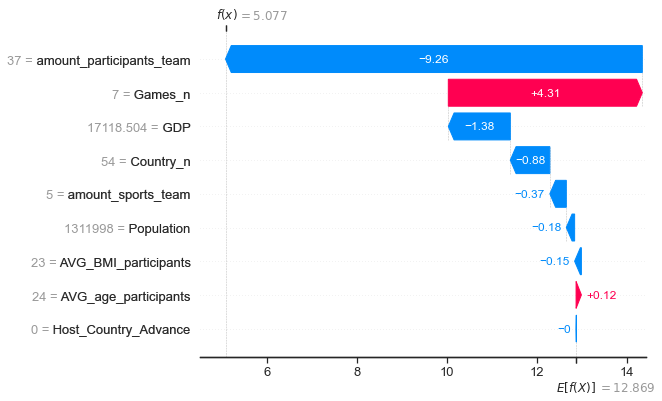

In [130]:
import shap

explainer = shap.Explainer(gb_reg)
shap_values = explainer(x_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

The predicted value for all teams is E [f (X)].
For example, forces in red contribute to the increase in the amount of medals and in blue to the decrease.
The cumulative amount of attributes that decrease the amount of medals exceeds the total of attributes that increase the amount of medals and therefore the amount of medals that the model predicts for example f (x) is lower (the expected number of medals is 0.176 compared to 12,162 medals of an average team).

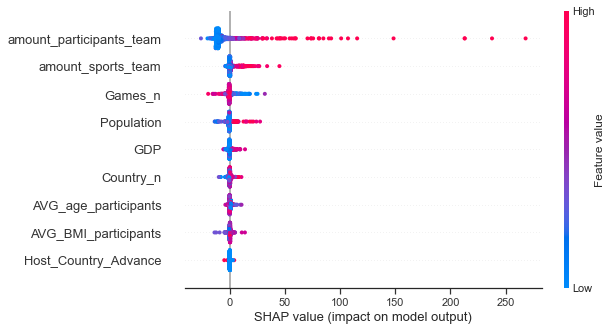

In [131]:
shap.plots.beeswarm(shap_values)

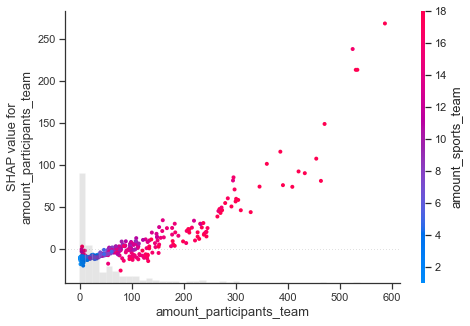

In [132]:
shap.plots.scatter(shap_values[:,"amount_participants_team"], color=shap_values)

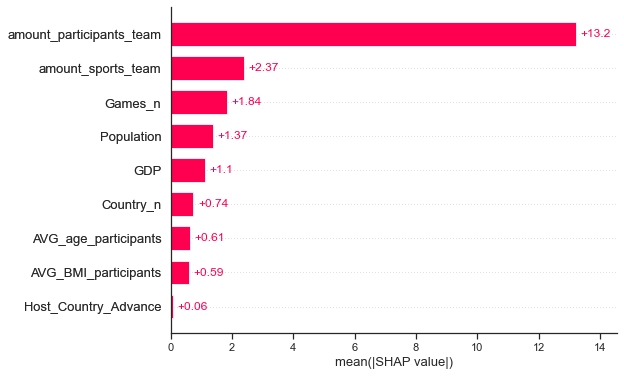

In [133]:
shap.plots.bar(shap_values)

## Summary

We will summarize the insights we gained using SHAP.
The size of the team has the highest impact on the amount of medals. After that, the amount of sports that the team participates in, the amount of games, the amount of population, GDP and more.

In addition we learn that the number of sports has increased so that the number of contestants is increasing.

Non-influencing factors are: ages and bmi of the competitors and also there is no advantage for a team competing in its own country.

## Conclusion

We will start from the end and say that we have achieved a good level of prediction(better than expected at the beginning of the project) with our best model (86% of the variance can be explained).

In retrospect and after understanding the data we could not get over 95 percent for some reason.

The first: the reliability of the data, the first table (athlete) was with 280,000 records that each record describes one participant in a particular event.
The assumption before the start of the project was that the data were reliable but it was still impossible to control 100 percent reliability.
For example in the data of competitors in the first Olympics.
The games started in 1896 and a lot of data like age, height and weight are missing and some of the data is not as logical as 10 year old contestants so this will unequivocally affect the model.

The second: the data on the population and the population that we extracted from a table of the (dictionary) are correct for the last 5 years.
There may not be a big change between the 2016 and 1980 data but there will probably be a significant change between 2016 and 1920 and these data are also likely to be misleading.

The third reason: could be in building the model I had to focus on the data and then the accuracy was much higher.
I mean focus only on the Summer Olympics from 1980 but I gave it up because it dropped 2/3 of the data.

## Personal Experience

My personal experience from the workshop was very good and far beyond expectations.
I had an idea but my programming abilities in the beginning were far from the level required for me to be able to implement the idea and it took me a lot of time to learn the topics (some of them right on the go) so that I could implement them in the project.

I started the workshop with a basic knowledge of Python and no knowledge at all of machine learning.
And it was very important to me to learn from scratch to improve my basic programming skills and to learn from scratch the main relevant libraries in the project (pandas, numpy, seaborn, matplotlib and sklearn) including knowing it will take time but the end result will be high level so I can present the project in interviews Work after graduation.

In conclusion I am very happy that I was able to research the subject of the Olympics and come up with interesting insights that maybe frustrated people can learn something new from.

The project will be very challenging on a personal level and with its help I learned to work on data, to interrogate them, to adjust graphs that best suit the type of data and most importantly I was able to build its first forecasting model.

The workshop exposed me to the field of data science and made me love the field, look for a job in it after graduation and a desire to continue my studies and become a data scientist myself.